# Data Source & Data Pre-processing

## Downloading US stock price dataset in April, 18, 2024.

In [35]:
from pyfinviz.screener import Screener
import pandas as pd

options = [Screener.IndustryOption.STOCKS_ONLY_EX_FUNDS, Screener.CountryOption.USA]
screener = Screener(filter_options=options, view_option=Screener.ViewOption.VALUATION,
                    pages=[x for x in range(1, 223)])
all_data_frames = screener.data_frames.values()
concatenated_df = pd.concat(all_data_frames)
concatenated_df.reset_index(drop=True, inplace=True)

today_date = datetime.now().strftime('%Y-%m-%d')
filename = f'USstock_{today_date}.csv'
concatenated_df.to_csv(filename, index=False)

print(f"All pages have been merged and saved to 'USstock_{today_date}.csv' as of {today_date}.")
USstock = pd.read_csv(filename)
USstock.head()


All pages have been merged and saved to 'USstock_2024-04-18.csv' as of 2024-04-18.


,No,Ticker,MarketCap,PE,FwdPE,PEG,PS,PB,PC,PFCF,EPSthisY,EPSnextY,EPSpast5Y,EPSnext5Y,Salespast5Y,Price,Change,Volume
0,1,A,38.81B,31.55,21.70,3.92,5.76,6.27,22.20,23.54,1.13%,10.94%,33.93%,8.05%,7.00%,132.44,-1.57%,"1,936,563"
1,2,AA,6.37B,-,17.22,-,0.60,1.49,4.59,-,98.37%,5670.50%,-,44.30%,-2.77%,35.47,-0.23%,"11,601,635"
2,3,AACI,90.14M,-,-,-,-,5.42,1802.84,-,-,-,-,-,0.00%,11.17,0.00%,118
3,4,AACT,664.38M,39.28,-,-,-,1.32,347.84,-,-,-,-,-,0.00%,10.63,0.19%,"804,210"
4,5,AADI,44.19M,-,-,-,1.81,0.42,0.41,-,-1.07%,-18.00%,11.87%,-,225.26%,1.80,-1.10%,"150,100"


In [45]:
import pandas as pd
USstock_cleaned = pd.read_csv('USstock_2024-04-18.csv')
num_rows = len(USstock_cleaned)
print(f"The dataset has  {num_rows} rows")

The dataset has  4412 rows


### Check and Remove Null and Duplicate Rows

In [36]:
import pandas as pd
import numpy as np

USstock = pd.read_csv(filename)
USstock.replace('-', np.nan, inplace=True)
na_counts = USstock.isna().sum()
print(f"the amount of N/A is {na_counts}")
USstock_cleaned = USstock.dropna()
duplicates = USstock_cleaned.duplicated().sum()
print(f"the amount of duplicates is {duplicates}")


the amount of N/A is No                0
Ticker            0
MarketCap        18
PE             2084
FwdPE          1880
PEG            2915
PS              578
PB              429
PC              538
PFCF           2001
EPSthisY        875
EPSnextY        973
EPSpast5Y      1333
EPSnext5Y      2078
Salespast5Y     223
Price             7
Change            7
Volume            0
dtype: int64
the amount of duplicates is 0


### Save the new without-NA file to Cleaned_USstock_.csv

The name of the file changed from 2024-4-18 to 2024-4-19 due to this line of code was run just after 12:00 a.m., the dataset is actually still come from April, 18th, 2024.

In [49]:
from datetime import datetime

today_date = datetime.now().strftime('%Y-%m-%d')
filename = f'Cleaned_USstock_{today_date}.csv'
USstock_cleaned.to_csv(filename, index=False)
print(f"USstock_cleaned has been saved to '{filename}' as of {today_date}.")
USstock_cleaned = pd.read_csv(filename)
USstock_cleaned.head()

USstock_cleaned has been saved to 'Cleaned_USstock_2024-04-19.csv' as of 2024-04-19.


,No,Ticker,MarketCap,PE,FwdPE,PEG,PS,PB,PC,PFCF,EPSthisY,EPSnextY,EPSpast5Y,EPSnext5Y,Salespast5Y,Price,Change,Volume
0,1,A,38.81B,31.55,21.70,3.92,5.76,6.27,22.20,23.54,1.13%,10.94%,33.93%,8.05%,7.00%,132.44,-1.57%,"1,936,563"
1,12,AAON,7.00B,39.98,30.76,3.33,5.99,9.45,775.85,129.12,4.17%,20.93%,31.82%,12.00%,23.88%,85.24,-1.23%,"395,662"
2,13,AAP,4.60B,104.27,17.46,1.65,0.41,1.82,9.14,102.36,671.35%,14.64%,-38.63%,63.30%,3.37%,77.20,4.25%,"2,123,063"
3,14,AAPL,2579.41B,25.99,23.46,2.36,6.69,34.85,35.29,24.14,7.09%,8.48%,15.55%,11.00%,8.34%,167.04,-0.57%,"42,517,557"
4,18,ABBV,291.56B,60.53,13.56,9.64,5.37,28.07,22.75,13.24,0.27%,9.02%,-5.77%,6.28%,11.76%,164.66,0.25%,"4,480,015"


### Save the Original File

Copy 'Cleaned_USstock_2024-04-19.csv' as 'Cleaned_USstock2_2024-04-19.csv' for further analysis, leaving 'Cleaned_USstock_2024-04-19.csv' as the original dataset to avoid any further changes.

In [70]:
today_date = datetime.now().strftime('%Y-%m-%d')
filename = f'Cleaned_USstock2_{today_date}.csv'
USstock_cleaned.to_csv(filename, index=False)
print(f"Cleaned_USstock_{today_date} has been copied to record the transfered numeric data.")
Cleaned_USstock2_ = pd.read_csv(filename)
Cleaned_USstock2_.head()

Cleaned_USstock_2024-04-19 has been copied to record the transfered numeric data.


,No,Ticker,MarketCap,PE,FwdPE,PEG,PS,PB,PC,PFCF,EPSthisY,EPSnextY,EPSpast5Y,EPSnext5Y,Salespast5Y,Price,Change,Volume
0,1,A,38.81B,31.55,21.70,3.92,5.76,6.27,22.20,23.54,1.13%,10.94%,33.93%,8.05%,7.00%,132.44,-1.57%,"1,936,563"
1,12,AAON,7.00B,39.98,30.76,3.33,5.99,9.45,775.85,129.12,4.17%,20.93%,31.82%,12.00%,23.88%,85.24,-1.23%,"395,662"
2,13,AAP,4.60B,104.27,17.46,1.65,0.41,1.82,9.14,102.36,671.35%,14.64%,-38.63%,63.30%,3.37%,77.20,4.25%,"2,123,063"
3,14,AAPL,2579.41B,25.99,23.46,2.36,6.69,34.85,35.29,24.14,7.09%,8.48%,15.55%,11.00%,8.34%,167.04,-0.57%,"42,517,557"
4,18,ABBV,291.56B,60.53,13.56,9.64,5.37,28.07,22.75,13.24,0.27%,9.02%,-5.77%,6.28%,11.76%,164.66,0.25%,"4,480,015"


### Transfer objects to float 
This step would be very helpful in the later heatmap analysis.

In [3]:
import pandas as pd
Cleaned_USstock2_ = pd.read_csv('Cleaned_USstock2_2024-04-19.csv')
print(Cleaned_USstock2_.dtypes)
print(len(Cleaned_USstock2_))
Cleaned_USstock2_.head()

No               int64
Ticker          object
MarketCap       object
PE             float64
FwdPE          float64
PEG            float64
PS             float64
PB             float64
PC             float64
PFCF           float64
EPSthisY        object
EPSnextY        object
EPSpast5Y       object
EPSnext5Y       object
Salespast5Y     object
Price          float64
Change          object
Volume          object
dtype: object
859


,No,Ticker,MarketCap,PE,FwdPE,PEG,PS,PB,PC,PFCF,EPSthisY,EPSnextY,EPSpast5Y,EPSnext5Y,Salespast5Y,Price,Change,Volume
0,1,A,38.81B,31.55,21.70,3.92,5.76,6.27,22.20,23.54,1.13%,10.94%,33.93%,8.05%,7.00%,132.44,-1.57%,"1,936,563"
1,12,AAON,7.00B,39.98,30.76,3.33,5.99,9.45,775.85,129.12,4.17%,20.93%,31.82%,12.00%,23.88%,85.24,-1.23%,"395,662"
2,13,AAP,4.60B,104.27,17.46,1.65,0.41,1.82,9.14,102.36,671.35%,14.64%,-38.63%,63.30%,3.37%,77.20,4.25%,"2,123,063"
3,14,AAPL,2579.41B,25.99,23.46,2.36,6.69,34.85,35.29,24.14,7.09%,8.48%,15.55%,11.00%,8.34%,167.04,-0.57%,"42,517,557"
4,18,ABBV,291.56B,60.53,13.56,9.64,5.37,28.07,22.75,13.24,0.27%,9.02%,-5.77%,6.28%,11.76%,164.66,0.25%,"4,480,015"


### Transfer MarketCap to numeric, clean percentage to float, clean volumn column

In [4]:
Cleaned_USstock2_['MarketCap'] = Cleaned_USstock2_['MarketCap'].str.replace('B', 'e9', regex=False)
Cleaned_USstock2_['MarketCap'] = Cleaned_USstock2_['MarketCap'].str.replace('M', 'e6', regex=False)
Cleaned_USstock2_['MarketCap'] = pd.to_numeric(Cleaned_USstock2_['MarketCap'], errors='coerce')
Cleaned_USstock2_['EPSthisY'] = Cleaned_USstock2_['EPSthisY'].str.rstrip('%').astype('float') / 100.0
Cleaned_USstock2_['EPSnextY'] = Cleaned_USstock2_['EPSnextY'].str.rstrip('%').astype('float') / 100.0
Cleaned_USstock2_['EPSpast5Y'] = Cleaned_USstock2_['EPSpast5Y'].str.rstrip('%').astype('float') / 100.0
Cleaned_USstock2_['EPSnext5Y'] = Cleaned_USstock2_['EPSnext5Y'].str.rstrip('%').astype('float') / 100.0
Cleaned_USstock2_['Salespast5Y'] = Cleaned_USstock2_['Salespast5Y'].str.rstrip('%').astype('float') / 100.0
Cleaned_USstock2_['Change'] = Cleaned_USstock2_['Change'].str.rstrip('%').astype('float') / 100.0
Cleaned_USstock2_['Volume'] = Cleaned_USstock2_['Volume'].str.replace(',', '').astype(int)

Cleaned_USstock2_.head()

,No,Ticker,MarketCap,PE,FwdPE,PEG,PS,PB,PC,PFCF,EPSthisY,EPSnextY,EPSpast5Y,EPSnext5Y,Salespast5Y,Price,Change,Volume
0,1,A,3.881000e+10,31.55,21.70,3.92,5.76,6.27,22.20,23.54,0.0113,0.1094,0.3393,0.0805,0.0700,132.44,-0.0157,1936563
1,12,AAON,7.000000e+09,39.98,30.76,3.33,5.99,9.45,775.85,129.12,0.0417,0.2093,0.3182,0.1200,0.2388,85.24,-0.0123,395662
2,13,AAP,4.600000e+09,104.27,17.46,1.65,0.41,1.82,9.14,102.36,6.7135,0.1464,-0.3863,0.6330,0.0337,77.20,0.0425,2123063
3,14,AAPL,2.579410e+12,25.99,23.46,2.36,6.69,34.85,35.29,24.14,0.0709,0.0848,0.1555,0.1100,0.0834,167.04,-0.0057,42517557
4,18,ABBV,2.915600e+11,60.53,13.56,9.64,5.37,28.07,22.75,13.24,0.0027,0.0902,-0.0577,0.0628,0.1176,164.66,0.0025,4480015


## Acquiring S&P 500 Dataset

The following are SP500 dataset of 5 years

In [141]:
import yfinance as yf
from datetime import datetime

def fetch_and_save_sp500():
    sp500_ticker = "^GSPC"
    today_date = datetime.now().strftime('%Y%m%d')
    file_name = f'sp500_closing_prices_{today_date}.csv'
    data = yf.download(sp500_ticker, period="5y")
    data = data.reset_index()
    data_close = data[['Date', 'Close']]
    data_close.to_csv(file_name, index=False)
    print(f"Closing prices for S&P 500 saved to {file_name}")


fetch_and_save_sp500()


[*********************100%%**********************]  1 of 1 completed

Closing prices for S&P 500 saved to sp500_closing_prices_20240419.csv


Take a look at the sp500 dataset

In [142]:
import pandas as pd
sp500 = pd.read_csv('sp500_closing_prices_20240419.csv')
print(sp500.head())


         Date        Close
0  2019-04-22  2907.969971
1  2019-04-23  2933.679932
2  2019-04-24  2927.250000
3  2019-04-25  2926.169922
4  2019-04-26  2939.879883


### Set Date as Index

In [38]:
import pandas as pd
sp500 = pd.read_csv('sp500_closing_prices_20240419.csv')
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.set_index('Date', inplace=True)

## Acquiring Closing Prices of AAPL, MSFT, NVDA, BABA 

In [136]:
import yfinance as yf
from datetime import datetime

tech_stocks = ['AAPL', 'MSFT', 'NVDA', 'BABA']

def fetch_and_save_stocks(stock_list, sector_name):
    today_date = datetime.now().strftime('%Y%m%d')
    file_name = f'{sector_name}_sector_stocks_closing_prices_{today_date}.csv'
    data = yf.download(stock_list, period="5y") 
    closing_prices = data['Close']
    closing_prices.columns = stock_list 
    closing_prices.to_csv(file_name)
    print(f"Closing prices for {', '.join(stock_list)} saved to {file_name}")

fetch_and_save_stocks(tech_stocks, 'technology')



[*********************100%%**********************]  4 of 4 completed


Closing prices for AAPL, MSFT, NVDA, BABA saved to technology_sector_stocks_closing_prices_20240419.csv


[*********************100%%**********************]  3 of 3 completed


Closing prices for JNJ, PFE, MRK saved to healthcare_sector_stocks_closing_prices_20240419.csv


[*********************100%%**********************]  3 of 3 completed


Closing prices for PG, NKE, AMZN saved to consumer_goods_sector_stocks_closing_prices_20240419.csv


[*********************100%%**********************]  2 of 2 completed
[                       0%%                      ]

Closing prices for XOM, NEE saved to energy_sector_stocks_closing_prices_20240419.csv


[*********************100%%**********************]  3 of 3 completed

Closing prices for BRK-B, JPM, V saved to financial_services_sector_stocks_closing_prices_20240419.csv


In [8]:
import pandas as pd
tech = pd.read_csv('technology_sector_stocks_closing_prices_20240419.csv')
tech.head()

,Date,AAPL,MSFT,NVDA,BABA
0,2019-04-22,51.132500,185.380005,123.760002,47.117500
1,2019-04-23,51.869999,187.289993,125.440002,47.667500
2,2019-04-24,51.790001,185.669998,125.010002,47.792500
3,2019-04-25,51.320000,187.880005,129.149994,46.727501
4,2019-04-26,51.075001,187.089996,129.889999,44.522499


## Acquiring Seasonal Financial Reports of AAPL, MSFT, NVDA, BABA and Combining with Stock History Prices

### Acquiring AAPL's Seasonal Report:

In [42]:
import pandas as pd
import yfinance as yf

aapl = yf.Ticker('AAPL')
quarterly_financials = aapl.quarterly_financials
quarterly_financials = quarterly_financials.T  
quarterly_financials.index = pd.to_datetime(quarterly_financials.index)  # Set the date as index
quarterly_financials.head()

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,...,Interest Expense Non Operating,Interest Income Non Operating,Operating Income,Operating Expense,Research And Development,Selling General And Administration,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
2023-12-31,0.0,0.159,43221000000.0,33916000000.0,2848000000.0,64720000000.0,43221000000.0,40373000000.0,NaN,NaN,...,NaN,NaN,40373000000.0,14482000000.0,7696000000.0,6786000000.0,54855000000.0,64720000000.0,119575000000.0,119575000000.0
2023-09-30,0.0,0.149715,30653000000.0,22956000000.0,2653000000.0,49071000000.0,30653000000.0,28000000000.0,-18000000.0,1002000000.0,...,1002000000.0,984000000.0,26969000000.0,13458000000.0,7307000000.0,6151000000.0,40427000000.0,49071000000.0,89498000000.0,89498000000.0
2023-06-30,0.0,0.125,26783000000.0,19881000000.0,3052000000.0,45384000000.0,26783000000.0,23731000000.0,-18000000.0,998000000.0,...,998000000.0,980000000.0,22998000000.0,13415000000.0,7442000000.0,5973000000.0,36413000000.0,45384000000.0,81797000000.0,81797000000.0
2023-03-31,0.0,0.149,32210000000.0,24160000000.0,2898000000.0,52860000000.0,32210000000.0,29312000000.0,-12000000.0,930000000.0,...,930000000.0,918000000.0,28318000000.0,13658000000.0,7457000000.0,6201000000.0,41976000000.0,52860000000.0,94836000000.0,94836000000.0


### Combine the stock price history with the financial report dataset

In [53]:
import pandas as pd
import yfinance as yf
 
tech = pd.read_csv('technology_sector_stocks_closing_prices_20240419.csv')
tech['Date'] = pd.to_datetime(tech['Date'])
tech.set_index('Date', inplace=True)
aapl_prices = tech[['AAPL']]
start_date = '2023-03-31'
end_date = '2024-03-31'

aapl_prices = aapl_prices.loc[start_date:end_date]

specific_dates = pd.to_datetime(["2023-12-31", "2023-09-30", "2023-06-30", "2023-03-31"])
quarterly_financials = quarterly_financials.reindex(specific_dates)


quarterly_financials_daily = quarterly_financials.reindex(pd.date_range(start=aapl_prices.index.min(), end=aapl_prices.index.max()), method='bfill')

AAPL_combined_data = aapl_prices.join(quarterly_financials_daily, how='left')

AAPL_combined_data.head()

,AAPL,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,...,Interest Expense Non Operating,Interest Income Non Operating,Operating Income,Operating Expense,Research And Development,Selling General And Administration,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-31,164.899994,0.0,0.149,32210000000.0,24160000000.0,2898000000.0,52860000000.0,32210000000.0,29312000000.0,-12000000.0,...,930000000.0,918000000.0,28318000000.0,13658000000.0,7457000000.0,6201000000.0,41976000000.0,52860000000.0,94836000000.0,94836000000.0
2023-04-03,166.169998,0.0,0.149,32210000000.0,24160000000.0,2898000000.0,52860000000.0,32210000000.0,29312000000.0,-12000000.0,...,930000000.0,918000000.0,28318000000.0,13658000000.0,7457000000.0,6201000000.0,41976000000.0,52860000000.0,94836000000.0,94836000000.0
2023-04-04,165.630005,0.0,0.149,32210000000.0,24160000000.0,2898000000.0,52860000000.0,32210000000.0,29312000000.0,-12000000.0,...,930000000.0,918000000.0,28318000000.0,13658000000.0,7457000000.0,6201000000.0,41976000000.0,52860000000.0,94836000000.0,94836000000.0
2023-04-05,163.759995,0.0,0.149,32210000000.0,24160000000.0,2898000000.0,52860000000.0,32210000000.0,29312000000.0,-12000000.0,...,930000000.0,918000000.0,28318000000.0,13658000000.0,7457000000.0,6201000000.0,41976000000.0,52860000000.0,94836000000.0,94836000000.0
2023-04-06,164.660004,0.0,0.149,32210000000.0,24160000000.0,2898000000.0,52860000000.0,32210000000.0,29312000000.0,-12000000.0,...,930000000.0,918000000.0,28318000000.0,13658000000.0,7457000000.0,6201000000.0,41976000000.0,52860000000.0,94836000000.0,94836000000.0


### Acquiring MSFT's Seasonal Report and Combining with Stock Price Dataset

In [13]:
import pandas as pd
import yfinance as yf


MSFT = yf.Ticker('MSFT')
quarterly_financials = MSFT.quarterly_financials
quarterly_financials = quarterly_financials.T 
quarterly_financials.index = pd.to_datetime(quarterly_financials.index) 

tech = pd.read_csv('technology_sector_stocks_closing_prices_20240419.csv')
tech['Date'] = pd.to_datetime(tech['Date'])
tech.set_index('Date', inplace=True)
MSFT_prices = tech[['MSFT']]
start_date = '2023-04-30'
end_date = '2024-03-31'

MSFT_prices = MSFT_prices.loc[start_date:end_date]
specific_dates = pd.to_datetime(["2023-12-31", "2023-09-30", "2023-06-30", "2023-03-31"])
quarterly_financials = quarterly_financials.reindex(specific_dates)

quarterly_financials_daily = quarterly_financials.reindex(pd.date_range(start=MSFT_prices.index.min(), end=MSFT_prices.index.max()), method='bfill')

MSFT_combined_data = MSFT_prices.join(quarterly_financials_daily, how='left')
MSFT_combined_data.head()

,MSFT,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,...,Operating Expense,Research And Development,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-01,84.160004,30780000.0,0.19,26556000000.0,162000000.0,162000000.0,18299000000.0,3549000000.0,16128000000.0,26718000000.0,...,14377000000.0,6984000000.0,7393000000.0,5750000000.0,1643000000.0,1643000000.0,36729000000.0,16128000000.0,52857000000.0,52857000000.0
2023-05-02,81.529999,30780000.0,0.19,26556000000.0,162000000.0,162000000.0,18299000000.0,3549000000.0,16128000000.0,26718000000.0,...,14377000000.0,6984000000.0,7393000000.0,5750000000.0,1643000000.0,1643000000.0,36729000000.0,16128000000.0,52857000000.0,52857000000.0
2023-05-03,81.480003,30780000.0,0.19,26556000000.0,162000000.0,162000000.0,18299000000.0,3549000000.0,16128000000.0,26718000000.0,...,14377000000.0,6984000000.0,7393000000.0,5750000000.0,1643000000.0,1643000000.0,36729000000.0,16128000000.0,52857000000.0,52857000000.0
2023-05-04,82.489998,30780000.0,0.19,26556000000.0,162000000.0,162000000.0,18299000000.0,3549000000.0,16128000000.0,26718000000.0,...,14377000000.0,6984000000.0,7393000000.0,5750000000.0,1643000000.0,1643000000.0,36729000000.0,16128000000.0,52857000000.0,52857000000.0
2023-05-05,83.220001,30780000.0,0.19,26556000000.0,162000000.0,162000000.0,18299000000.0,3549000000.0,16128000000.0,26718000000.0,...,14377000000.0,6984000000.0,7393000000.0,5750000000.0,1643000000.0,1643000000.0,36729000000.0,16128000000.0,52857000000.0,52857000000.0


Check and delete N/A.

In [15]:
MSFT_combined_data.dropna(inplace=True)

### Acquiring NVDA's Seasonal Report and Combining with Stock Price Dataset

In [16]:
import pandas as pd
import yfinance as yf
NVDA = yf.Ticker('NVDA')

quarterly_financials = NVDA.quarterly_financials
quarterly_financials = quarterly_financials.T 
quarterly_financials.index = pd.to_datetime(quarterly_financials.index) 

tech = pd.read_csv('technology_sector_stocks_closing_prices_20240419.csv')
tech['Date'] = pd.to_datetime(tech['Date'])
tech.set_index('Date', inplace=True)
NVDA_prices = tech[['NVDA']]
start_date = '2023-04-30'
end_date = '2024-03-31'

NVDA_prices = NVDA_prices.loc[start_date:end_date]

specific_dates = pd.to_datetime(["2024-01-31", "2023-10-31", "2023-07-31", "2023-04-30"])
quarterly_financials = quarterly_financials.reindex(specific_dates)
quarterly_financials_daily = quarterly_financials.reindex(pd.date_range(start=NVDA_prices.index.min(), end=NVDA_prices.index.max()), method='bfill')
NVDA_combined_data = NVDA_prices.join(quarterly_financials_daily, how='left')
NVDA_combined_data.head()

,NVDA,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,...,Interest Expense Non Operating,Interest Income Non Operating,Operating Income,Operating Expense,Research And Development,Selling General And Administration,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-01,305.559998,0.0,0.075,2659000000.0,0.0,0.0,2043000000.0,384000000.0,2544000000.0,2659000000.0,...,66000000.0,150000000.0,2140000000.0,2508000000.0,1875000000.0,633000000.0,4648000000.0,2544000000.0,7192000000.0,7192000000.0
2023-05-02,305.410004,0.0,0.075,2659000000.0,0.0,0.0,2043000000.0,384000000.0,2544000000.0,2659000000.0,...,66000000.0,150000000.0,2140000000.0,2508000000.0,1875000000.0,633000000.0,4648000000.0,2544000000.0,7192000000.0,7192000000.0
2023-05-03,304.399994,0.0,0.075,2659000000.0,0.0,0.0,2043000000.0,384000000.0,2544000000.0,2659000000.0,...,66000000.0,150000000.0,2140000000.0,2508000000.0,1875000000.0,633000000.0,4648000000.0,2544000000.0,7192000000.0,7192000000.0
2023-05-04,305.410004,0.0,0.075,2659000000.0,0.0,0.0,2043000000.0,384000000.0,2544000000.0,2659000000.0,...,66000000.0,150000000.0,2140000000.0,2508000000.0,1875000000.0,633000000.0,4648000000.0,2544000000.0,7192000000.0,7192000000.0
2023-05-05,310.649994,0.0,0.075,2659000000.0,0.0,0.0,2043000000.0,384000000.0,2544000000.0,2659000000.0,...,66000000.0,150000000.0,2140000000.0,2508000000.0,1875000000.0,633000000.0,4648000000.0,2544000000.0,7192000000.0,7192000000.0


Check and delete N/A.

In [17]:
NVDA_combined_data.dropna(inplace=True)

### Acquiring BABA's Seasonal Report and Combining with Stock Price Dataset

In [26]:
import pandas as pd
import yfinance as yf

BABA = yf.Ticker('BABA')

quarterly_financials = BABA.quarterly_financials
quarterly_financials = quarterly_financials.T  
quarterly_financials.index = pd.to_datetime(quarterly_financials.index) 
quarterly_financials.head()

tech = pd.read_csv('technology_sector_stocks_closing_prices_20240419.csv')
tech['Date'] = pd.to_datetime(tech['Date'])
tech.set_index('Date', inplace=True)
BABA_prices = tech[['BABA']]
start_date = '2023-04-30'
end_date = '2024-03-31'

BABA_prices = BABA_prices.loc[start_date:end_date]

specific_dates = pd.to_datetime(["2023-12-31", "2023-09-30", "2023-06-30", "2023-03-31"])
quarterly_financials = quarterly_financials.reindex(specific_dates)


quarterly_financials_daily = quarterly_financials.reindex(pd.date_range(start=BABA_prices.index.min(), end=MSFT_prices.index.max()), method='bfill')

BABA_combined_data = BABA_prices.join(quarterly_financials_daily, how='left')
BABA_combined_data.head()

,BABA,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,...,Amortization Of Intangibles Income Statement,Research And Development,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-01,289.100006,0.0,0.148491,19042000000.0,0.0,0.0,23644000000.0,2494000000.0,138823000000.0,19042000000.0,...,2494000000.0,13880000000.0,37763000000.0,24931000000.0,12832000000.0,12832000000.0,69377000000.0,138823000000.0,208200000000.0,171613000000.0
2023-05-02,282.100006,0.0,0.148491,19042000000.0,0.0,0.0,23644000000.0,2494000000.0,138823000000.0,19042000000.0,...,2494000000.0,13880000000.0,37763000000.0,24931000000.0,12832000000.0,12832000000.0,69377000000.0,138823000000.0,208200000000.0,171613000000.0
2023-05-03,278.019989,0.0,0.148491,19042000000.0,0.0,0.0,23644000000.0,2494000000.0,138823000000.0,19042000000.0,...,2494000000.0,13880000000.0,37763000000.0,24931000000.0,12832000000.0,12832000000.0,69377000000.0,138823000000.0,208200000000.0,171613000000.0
2023-05-04,275.619995,0.0,0.148491,19042000000.0,0.0,0.0,23644000000.0,2494000000.0,138823000000.0,19042000000.0,...,2494000000.0,13880000000.0,37763000000.0,24931000000.0,12832000000.0,12832000000.0,69377000000.0,138823000000.0,208200000000.0,171613000000.0
2023-05-05,286.799988,0.0,0.148491,19042000000.0,0.0,0.0,23644000000.0,2494000000.0,138823000000.0,19042000000.0,...,2494000000.0,13880000000.0,37763000000.0,24931000000.0,12832000000.0,12832000000.0,69377000000.0,138823000000.0,208200000000.0,171613000000.0


Check and delete N/A.

In [20]:
BABA_combined_data.dropna(inplace=True)

# Exploratory Data Analysis

## Check for correlation

In [22]:

sp500_df = pd.read_csv('sp500_closing_prices_20240419.csv')
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
sp500_df.set_index('Date', inplace=True)
combined_df = tech.join(sp500_df['Close'].rename('SP500'))
correlation_with_sp500 = combined_df.corr().loc['SP500']

#correlation of each stock with S&P 500
print(correlation_with_sp500.drop('SP500'))  # Exclude the SP500's own correlation


AAPL    0.919505
MSFT   -0.545658
NVDA    0.954972
BABA    0.806221
Name: SP500, dtype: float64


## Historical Stock Prices Comparision

The y-axis of sp500 is extremely much higher than other stocks, so double y-axis will be applied here.

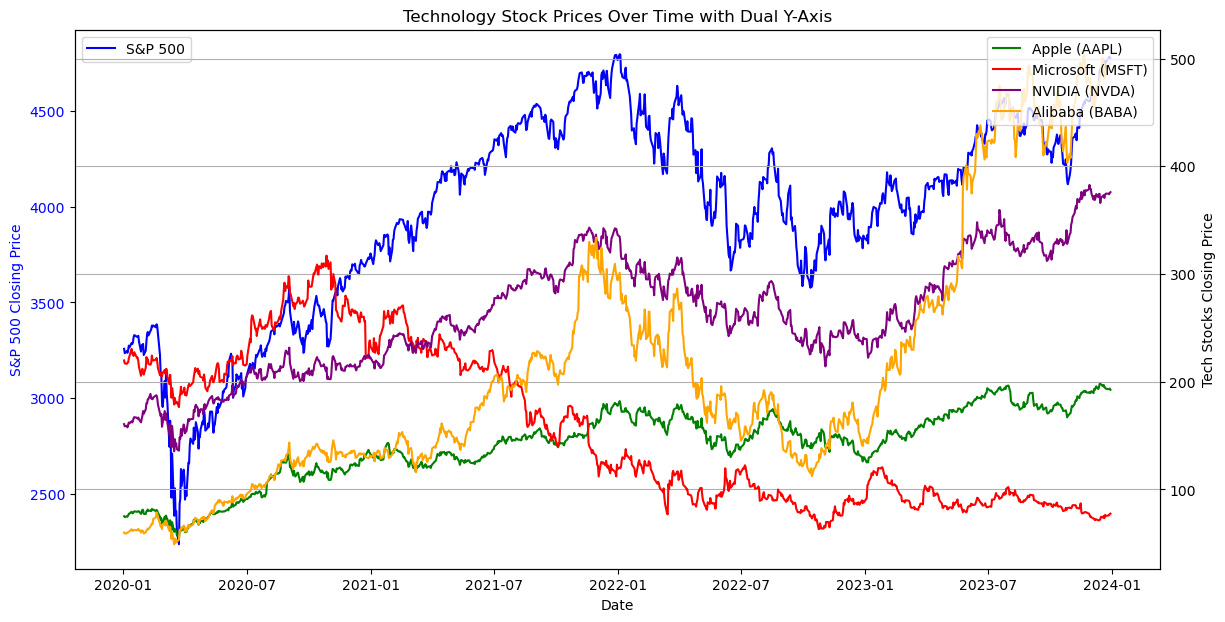

In [160]:
sp500['Date'] = pd.to_datetime(sp500['Date'])
tech['Date'] = pd.to_datetime(tech['Date'])

a = sp500[(sp500['Date'] >= '2020-01-01') & (sp500['Date'] <= '2024-01-01')]
b = tech[(tech['Date'] >= '2020-01-01') & (tech['Date'] <= '2024-01-01')]
fig, ax1 = plt.subplots(figsize=(14, 7))
# Plotting S&P 500 on the primary y-axis
ax1.plot(a['Date'], a['Close'], label='S&P 500', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500 Closing Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

#secondary y-axis
ax2 = ax1.twinx()

ax2.plot(b['Date'], b['AAPL'], label='Apple (AAPL)', color='green')
ax2.plot(b['Date'], b['MSFT'], label='Microsoft (MSFT)', color='red')
ax2.plot(b['Date'], b['NVDA'], label='NVIDIA (NVDA)', color='purple')
ax2.plot(b['Date'], b['BABA'], label='Alibaba (BABA)', color='orange')
ax2.set_ylabel('Tech Stocks Closing Price', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

# Title and grid
plt.title('Technology Stock Prices Over Time with Dual Y-Axis')
plt.grid(True)
plt.show()

## Seasonal Changepoint Detection

### S&P 500 Seasonal Changepoint Detection Analysis

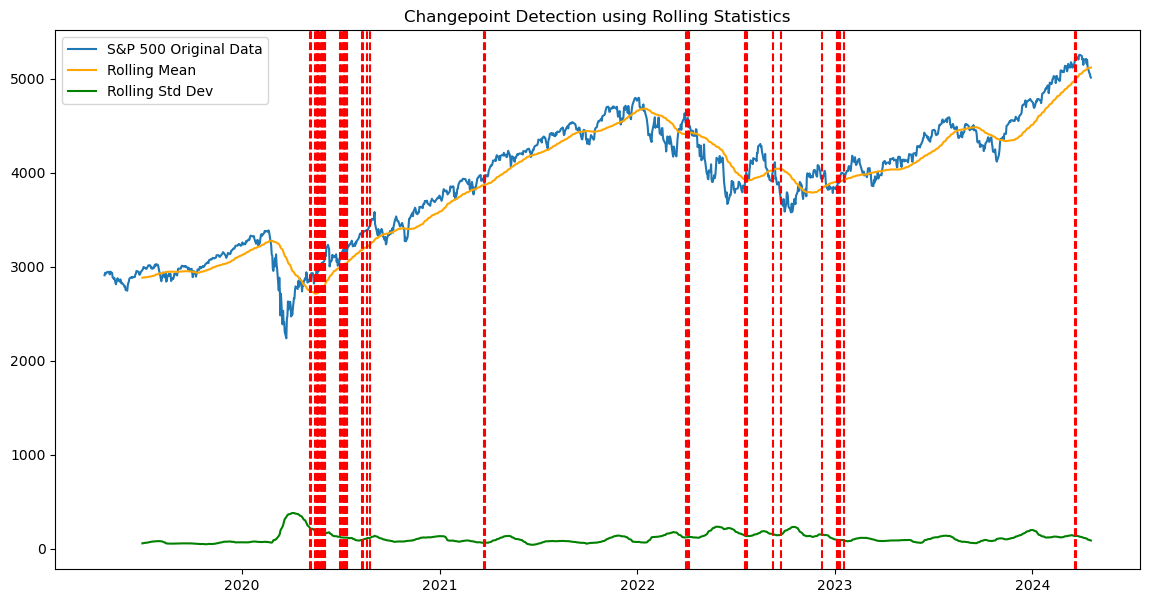

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


sp500 = pd.read_csv('sp500_closing_prices_20240419.csv')
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.set_index('Date', inplace=True) 

rolling_window = 50  
rolling_mean = sp500['Close'].rolling(window=rolling_window).mean()
rolling_std = sp500['Close'].rolling(window=rolling_window).std()

threshold = np.std(rolling_std) * 0.15 
significant_shifts = np.where(np.abs(np.diff(rolling_std)) > threshold)[0]

plt.figure(figsize=(14, 7))
plt.plot(sp500['Close'], label='S&P 500 Original Data')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')

for shift in significant_shifts:
    plt.axvline(x=sp500.index[shift + rolling_window - 1], color='red', linestyle='--')

plt.title('Changepoint Detection using Rolling Statistics')
plt.legend()
plt.show()    
 

### AAPL Seasonal Changepoint Detection Analysis

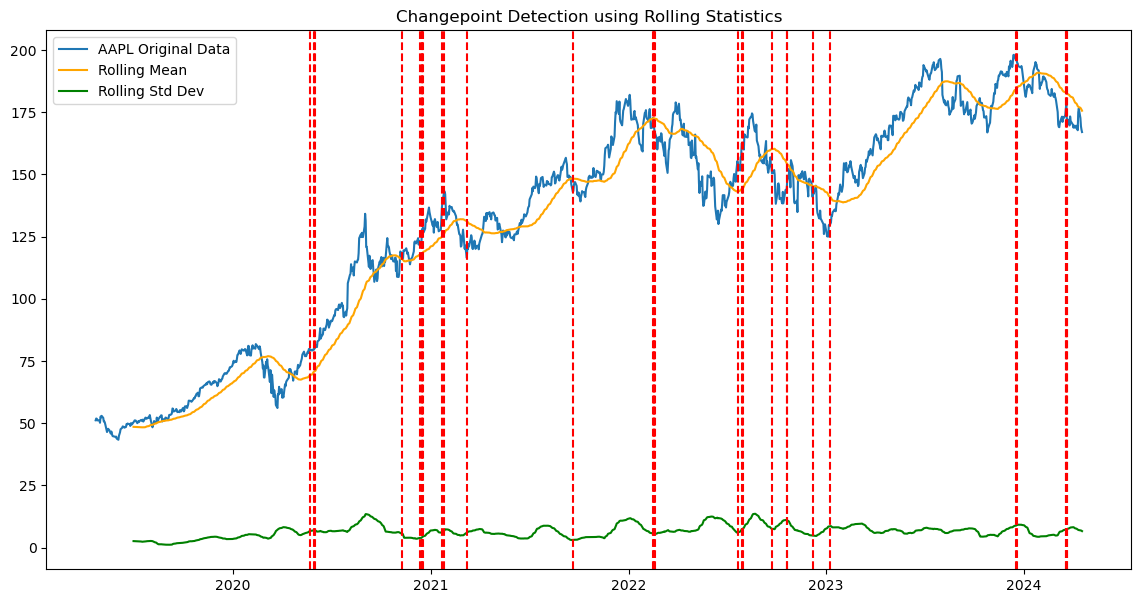

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

tech = pd.read_csv('technology_sector_stocks_closing_prices_20240419.csv')

tech['Date'] = pd.to_datetime(tech['Date'])
tech.set_index('Date', inplace=True)  


rolling_window = 50 
rolling_mean = tech['AAPL'].rolling(window=rolling_window).mean()
rolling_std = tech['AAPL'].rolling(window=rolling_window).std()

    

threshold = np.std(rolling_std) * 0.2
significant_shifts = np.where(np.abs(np.diff(rolling_std)) > threshold)[0]

plt.figure(figsize=(14, 7))
plt.plot(tech['AAPL'], label='AAPL Original Data')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')

for shift in significant_shifts:
    plt.axvline(x=tech.index[shift + rolling_window - 1], color='red', linestyle='--')

plt.title('Changepoint Detection using Rolling Statistics')
plt.legend()
plt.show()    
 

### MSFT Seasonal Changepoint Detection Analysis

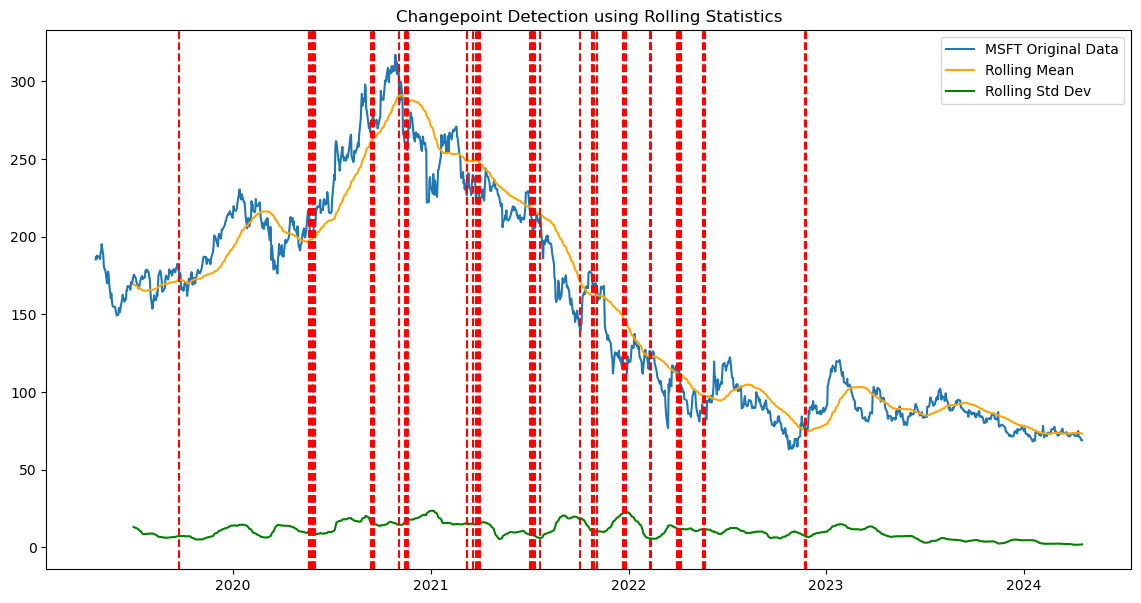

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

tech = pd.read_csv('technology_sector_stocks_closing_prices_20240419.csv')

tech['Date'] = pd.to_datetime(tech['Date'])
tech.set_index('Date', inplace=True) 


rolling_window = 50 
rolling_mean = tech['MSFT'].rolling(window=rolling_window).mean()
rolling_std = tech['MSFT'].rolling(window=rolling_window).std()

threshold = np.std(rolling_std) * 0.14
significant_shifts = np.where(np.abs(np.diff(rolling_std)) > threshold)[0]

plt.figure(figsize=(14, 7))
plt.plot(tech['MSFT'], label='MSFT Original Data')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')

for shift in significant_shifts:
    plt.axvline(x=tech.index[shift + rolling_window - 1], color='red', linestyle='--')

plt.title('Changepoint Detection using Rolling Statistics')
plt.legend()
plt.show()    
 

### NVDA Seasonal Changepoint Detection Analysis

IndexError: index 1284 is out of bounds for axis 0 with size 1258

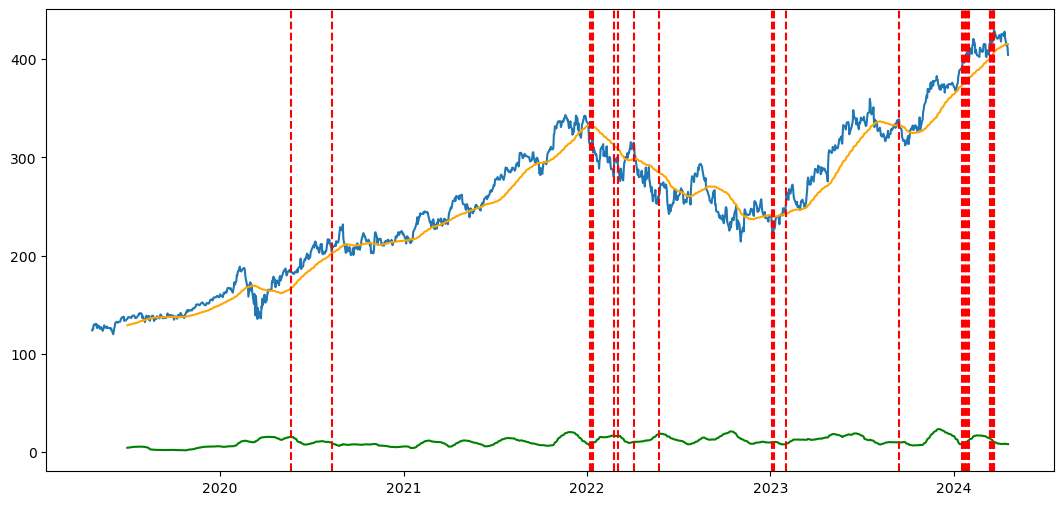

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

tech = pd.read_csv('technology_sector_stocks_closing_prices_20240419.csv')

tech['Date'] = pd.to_datetime(tech['Date'])
tech.set_index('Date', inplace=True)

rolling_window = 50 
rolling_mean = tech['NVDA'].rolling(window=rolling_window).mean()
rolling_std = tech['NVDA'].rolling(window=rolling_window).std()

threshold = np.std(rolling_std) * 0.2
significant_shifts = np.where(np.abs(np.diff(rolling_std)) > threshold)[0]

plt.figure(figsize=(13, 6))
plt.plot(tech['NVDA'], label='NVDA Original Data')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')

for shift in significant_shifts:
    plt.axvline(x=tech.index[shift + rolling_window - 1], color='red', linestyle='--')

plt.title('Changepoint Detection using Rolling Statistics')
plt.legend()
plt.show()    
 

### BABA Seasonal Changepoint Detection Analysis

IndexError: index 1258 is out of bounds for axis 0 with size 1258

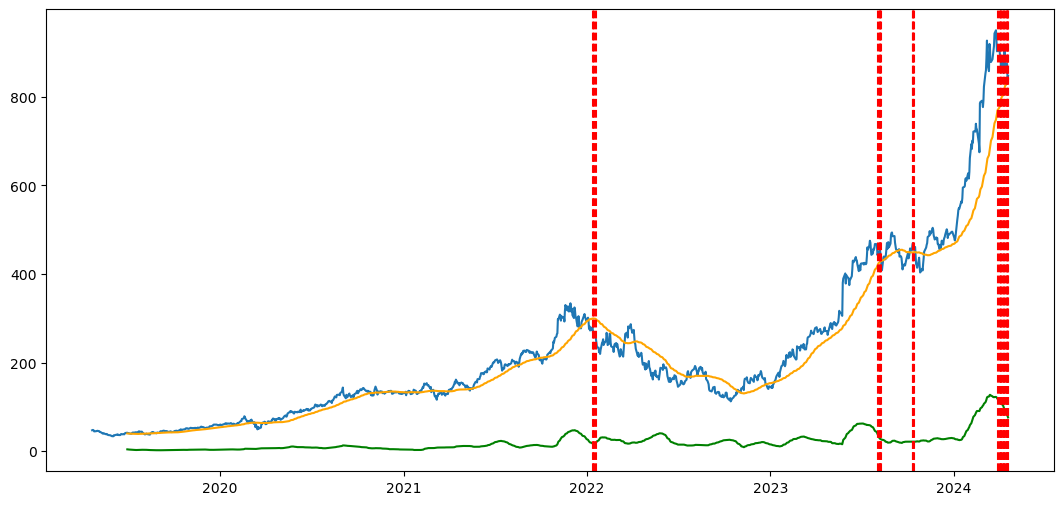

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

tech = pd.read_csv('technology_sector_stocks_closing_prices_20240419.csv')

tech['Date'] = pd.to_datetime(tech['Date'])
tech.set_index('Date', inplace=True)  


rolling_window = 50 
rolling_mean = tech['BABA'].rolling(window=rolling_window).mean()
rolling_std = tech['BABA'].rolling(window=rolling_window).std()

threshold = np.std(rolling_std) * 0.12
significant_shifts = np.where(np.abs(np.diff(rolling_std)) > threshold)[0]

plt.figure(figsize=(13, 6))
plt.plot(tech['BABA'], label='BABA Original Data')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')

for shift in significant_shifts:
    plt.axvline(x=tech.index[shift + rolling_window - 1], color='red', linestyle='--')

plt.title('Changepoint Detection using Rolling Statistics')
plt.legend()
plt.show()    
 

## Heatmap Analysis of Financial Factors

### Plotting the US Stock's Correlation Heatmap

Now check the correlations between financial factors and stock prices

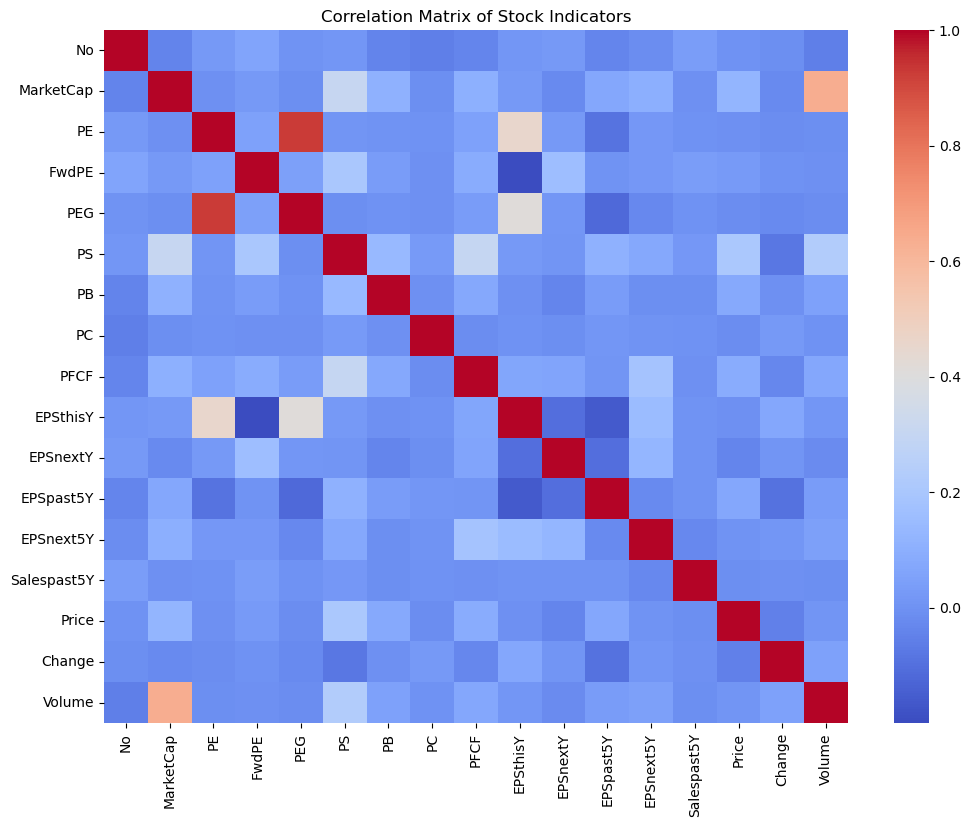

In [8]:
numeric_df = Cleaned_USstock2_.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Stock Indicators')
plt.show()


Then try to increase the threshold.

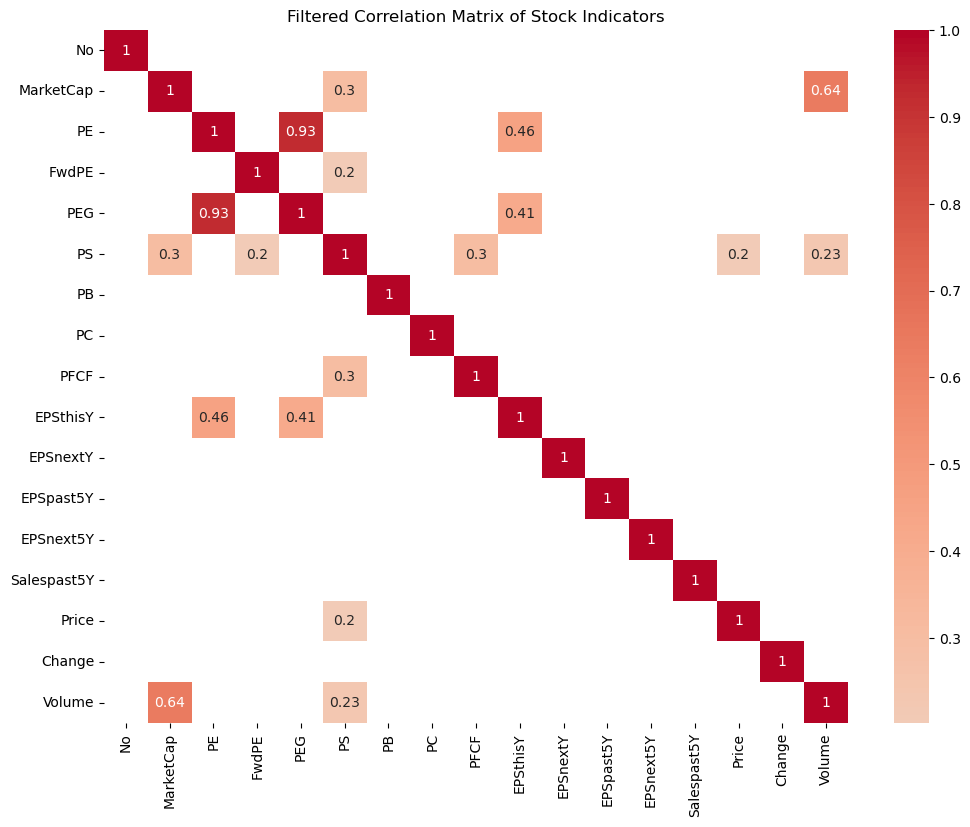

In [9]:
import matplotlib.pyplot as plt
lower_threshold = 0.2
mask = (correlation_matrix.abs() >= lower_threshold)
filtered_correlation_matrix = correlation_matrix.where(mask)
plt.figure(figsize=(12, 9))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Filtered Correlation Matrix of Stock Indicators')
plt.show()


### Plotting the AAPL's Correlation and Heatmap Matrix

AAPL                                                          1.000000
Interest Income Non Operating                                 0.501959
Interest Income                                               0.501959
Interest Expense Non Operating                                0.501866
Interest Expense                                              0.501866
Selling General And Administration                           -0.026872
Diluted EPS                                                  -0.028414
Basic EPS                                                    -0.028414
Operating Income                                             -0.037935
Total Operating Income As Reported                           -0.037935
Gross Profit                                                 -0.038364
Net Income Continuous Operations                             -0.039696
Net Income Including Noncontrolling Interests                -0.039696
Net Income                                                   -0.039696
Net In

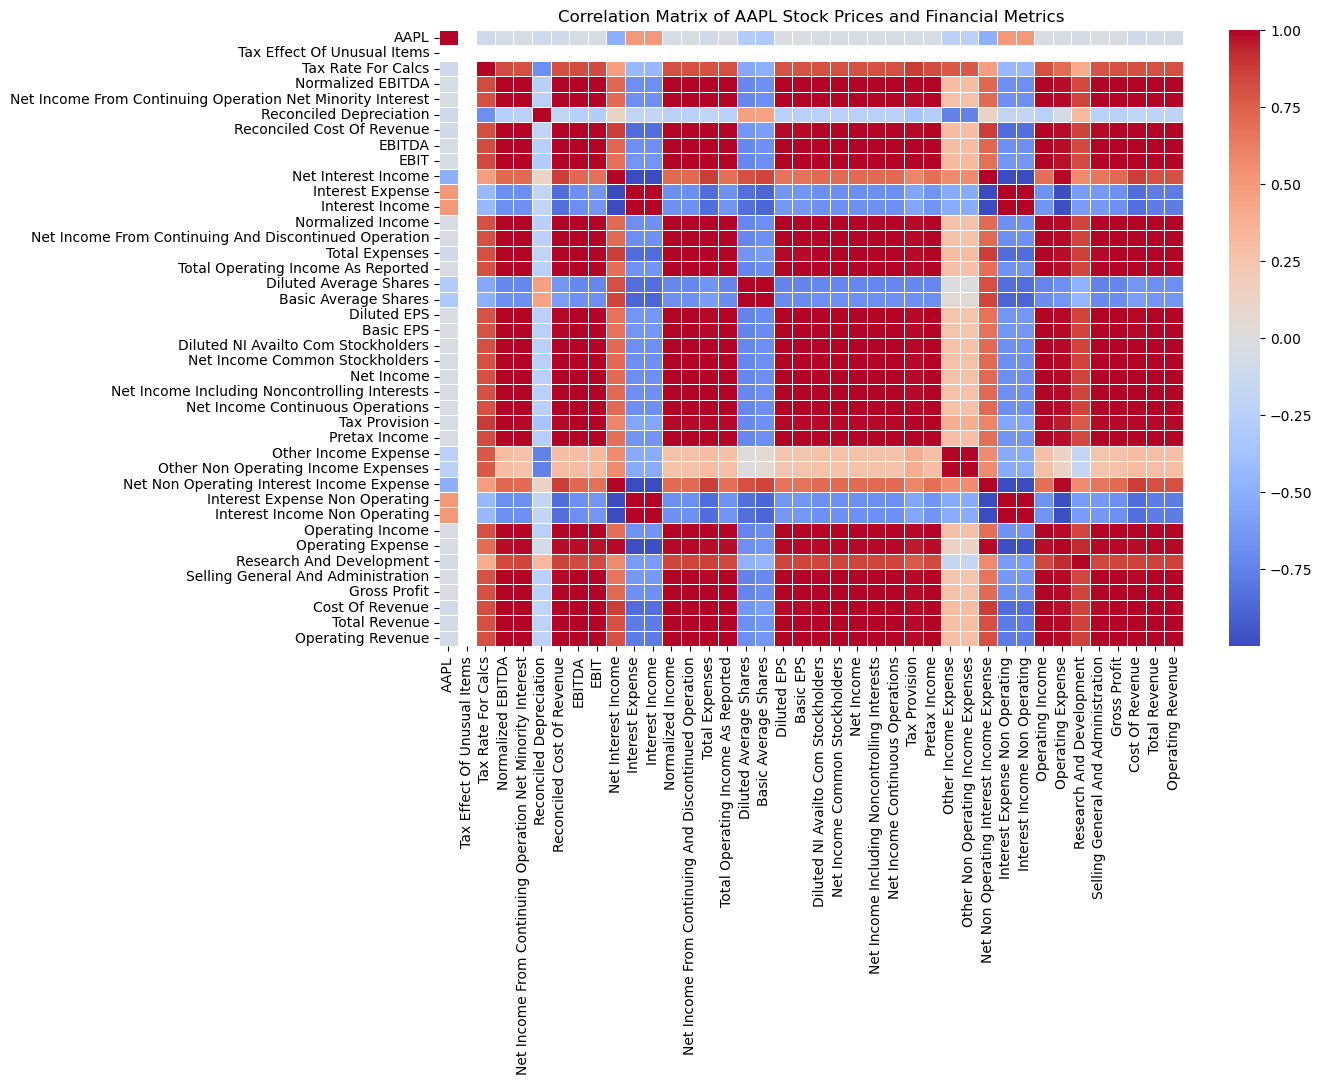

In [21]:
correlation_matrix = combined_data.corr()


print(correlation_matrix['AAPL'].sort_values(ascending=False))
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of AAPL Stock Prices and Financial Metrics')
plt.show()

### Plotting MSFT's Correlation and Heatmap

In [78]:
MSFT_combined_data.head()

,MSFT,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,...,Operating Expense,Research And Development,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-01,84.160004,30780000.0,0.19,26556000000.0,162000000.0,162000000.0,18299000000.0,3549000000.0,16128000000.0,26718000000.0,...,14377000000.0,6984000000.0,7393000000.0,5750000000.0,1643000000.0,1643000000.0,36729000000.0,16128000000.0,52857000000.0,52857000000.0
2023-05-02,81.529999,30780000.0,0.19,26556000000.0,162000000.0,162000000.0,18299000000.0,3549000000.0,16128000000.0,26718000000.0,...,14377000000.0,6984000000.0,7393000000.0,5750000000.0,1643000000.0,1643000000.0,36729000000.0,16128000000.0,52857000000.0,52857000000.0
2023-05-03,81.480003,30780000.0,0.19,26556000000.0,162000000.0,162000000.0,18299000000.0,3549000000.0,16128000000.0,26718000000.0,...,14377000000.0,6984000000.0,7393000000.0,5750000000.0,1643000000.0,1643000000.0,36729000000.0,16128000000.0,52857000000.0,52857000000.0
2023-05-04,82.489998,30780000.0,0.19,26556000000.0,162000000.0,162000000.0,18299000000.0,3549000000.0,16128000000.0,26718000000.0,...,14377000000.0,6984000000.0,7393000000.0,5750000000.0,1643000000.0,1643000000.0,36729000000.0,16128000000.0,52857000000.0,52857000000.0
2023-05-05,83.220001,30780000.0,0.19,26556000000.0,162000000.0,162000000.0,18299000000.0,3549000000.0,16128000000.0,26718000000.0,...,14377000000.0,6984000000.0,7393000000.0,5750000000.0,1643000000.0,1643000000.0,36729000000.0,16128000000.0,52857000000.0,52857000000.0


MSFT                                                          1.000000
Special Income Charges                                        0.913299
Interest Income Non Operating                                 0.913299
Total Unusual Items                                           0.913299
Total Unusual Items Excluding Goodwill                        0.913299
Interest Income                                               0.913299
Gain On Sale Of Security                                      0.913299
Net Non Operating Interest Income Expense                     0.913299
Net Interest Income                                           0.913299
Tax Rate For Calcs                                            0.913299
Other Income Expense                                          0.913299
Other Non Operating Income Expenses                           0.913299
Tax Effect Of Unusual Items                                   0.913299
Basic Average Shares                                          0.913299
Operat

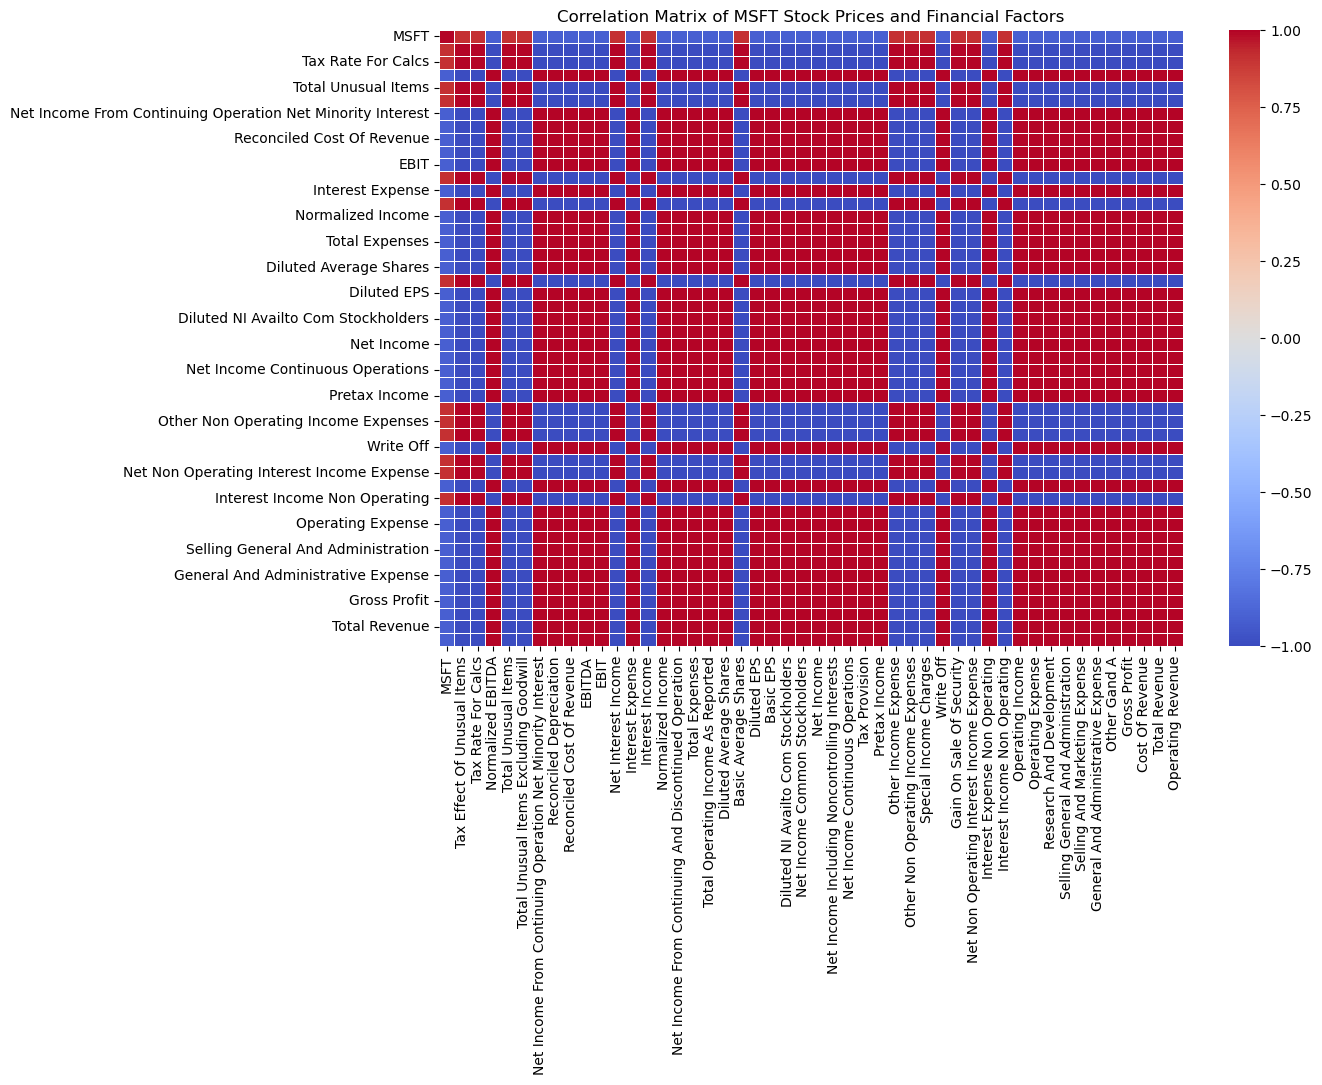

In [82]:
import numpy as np

for col in MSFT_combined_data.columns:
    try:
        MSFT_combined_data[col] = pd.to_numeric(MSFT_combined_data[col], errors='coerce')
    except Exception as e:
        print(f"Error converting {col}: {e}")

correlation_matrix = MSFT_combined_data.corr()
print(correlation_matrix['MSFT'].sort_values(ascending=False))
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of MSFT Stock Prices and Financial Factors')

plt.show()


### Plotting NVDA's Correlation and Heatmap Matrix

NVDA                                                          1.000000
Selling General And Administration                            0.878571
Operating Expense                                             0.817033
Research And Development                                      0.788007
Net Interest Income                                           0.767205
Net Non Operating Interest Income Expense                     0.767205
Interest Income Non Operating                                 0.765318
Interest Income                                               0.765318
Gross Profit                                                  0.702794
Operating Income                                              0.694637
Total Operating Income As Reported                            0.694637
Tax Provision                                                 0.694423
Basic EPS                                                     0.688945
EBITDA                                                        0.688463
Normal

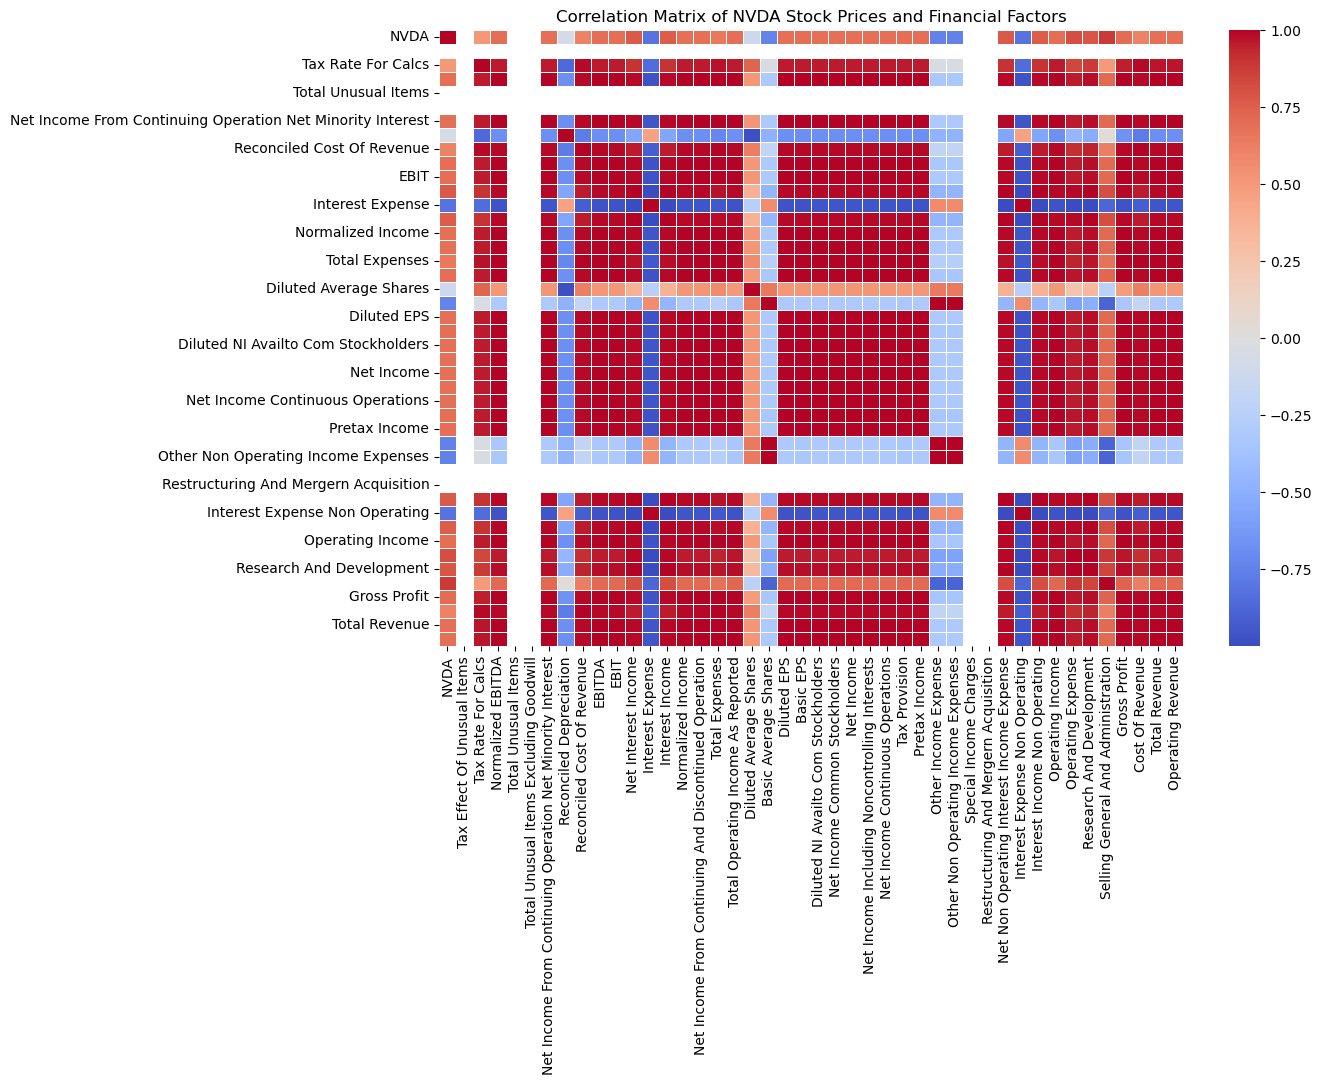

In [83]:
correlation_matrix = NVDA_combined_data.corr()
print(correlation_matrix['NVDA'].sort_values(ascending=False))
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of NVDA Stock Prices and Financial Factors')
plt.show()

BABA                                                          1.000000
Cost Of Revenue                                               0.835909
Reconciled Cost Of Revenue                                    0.835909
Selling And Marketing Expense                                 0.835286
Tax Rate For Calcs                                            0.833783
Reconciled Depreciation                                       0.827539
Amortization Of Intangibles Income Statement                  0.827539
Amortization                                                  0.827539
Depreciation And Amortization In Income Statement             0.827539
Depreciation Amortization Depletion Income Statement          0.827539
Total Revenue                                                 0.822578
Impairment Of Capital Assets                                  0.821038
Total Expenses                                                0.814870
Minority Interests                                            0.783279
Operat

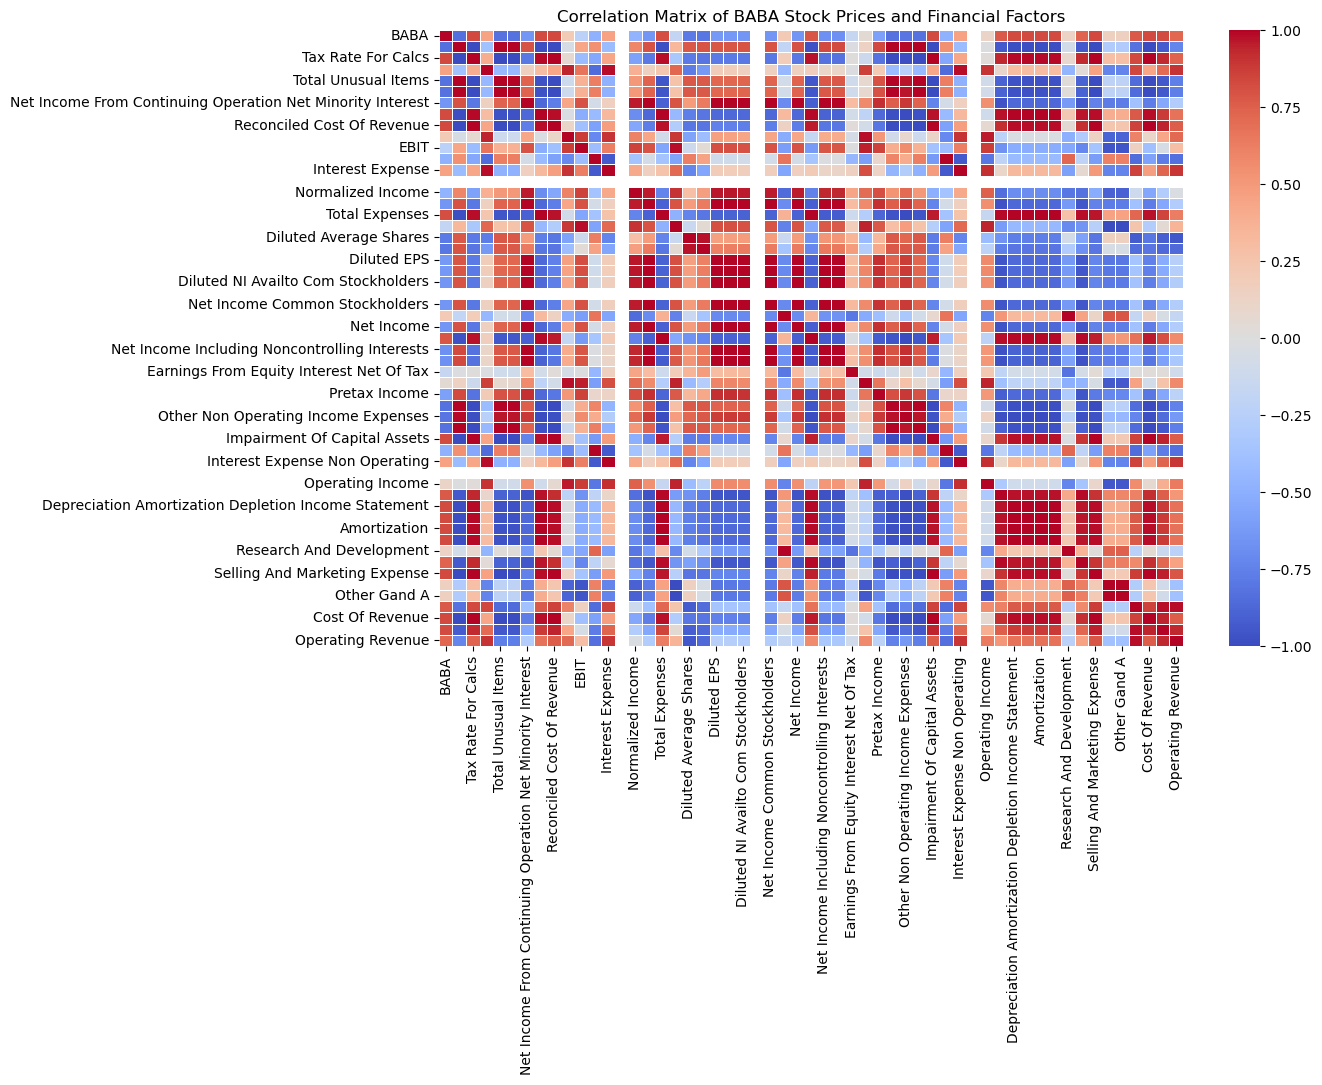

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = BABA_combined_data.corr()
print(correlation_matrix['BABA'].sort_values(ascending=False))
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of BABA Stock Prices and Financial Factors')
plt.show()

# LSTM Model Based on S&P 500

In [51]:
AAPL_combined_data.head()

,AAPL,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,...,Interest Expense Non Operating,Interest Income Non Operating,Operating Income,Operating Expense,Research And Development,Selling General And Administration,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-31,164.899994,0.0,0.149,32210000000.0,24160000000.0,2898000000.0,52860000000.0,32210000000.0,29312000000.0,-12000000.0,...,930000000.0,918000000.0,28318000000.0,13658000000.0,7457000000.0,6201000000.0,41976000000.0,52860000000.0,94836000000.0,94836000000.0
2023-04-03,166.169998,0.0,0.149,32210000000.0,24160000000.0,2898000000.0,52860000000.0,32210000000.0,29312000000.0,-12000000.0,...,930000000.0,918000000.0,28318000000.0,13658000000.0,7457000000.0,6201000000.0,41976000000.0,52860000000.0,94836000000.0,94836000000.0
2023-04-04,165.630005,0.0,0.149,32210000000.0,24160000000.0,2898000000.0,52860000000.0,32210000000.0,29312000000.0,-12000000.0,...,930000000.0,918000000.0,28318000000.0,13658000000.0,7457000000.0,6201000000.0,41976000000.0,52860000000.0,94836000000.0,94836000000.0
2023-04-05,163.759995,0.0,0.149,32210000000.0,24160000000.0,2898000000.0,52860000000.0,32210000000.0,29312000000.0,-12000000.0,...,930000000.0,918000000.0,28318000000.0,13658000000.0,7457000000.0,6201000000.0,41976000000.0,52860000000.0,94836000000.0,94836000000.0
2023-04-06,164.660004,0.0,0.149,32210000000.0,24160000000.0,2898000000.0,52860000000.0,32210000000.0,29312000000.0,-12000000.0,...,930000000.0,918000000.0,28318000000.0,13658000000.0,7457000000.0,6201000000.0,41976000000.0,52860000000.0,94836000000.0,94836000000.0


### Basic Model

Epoch 1/50


/var/folders/c6/1h0zxljx7pj2pvy91xhq_6qw0000gn/T/ipykernel_34547/725721661.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(method='ffill', inplace=True)
/var/folders/c6/1h0zxljx7pj2pvy91xhq_6qw0000gn/T/ipykernel_34547/725721661.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(method='bfill', inplace=True)
/Users/jady/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2954 - val_loss: 0.0470
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0873 - val_loss: 0.0462
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0525 - val_loss: 0.0533
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0528 - val_loss: 0.0442
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0460 - val_loss: 0.0580
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0480 - val_loss: 0.0688
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0490 - val_loss: 0.0577
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0464 - val_loss: 0.0606
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0452 - val_loss: 0.0796
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0454 - val_loss: 0.0840
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0413 - val_loss: 0.0787
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0438 - val_loss: 0.0762
Epoch 13/50
6/6 ━━━

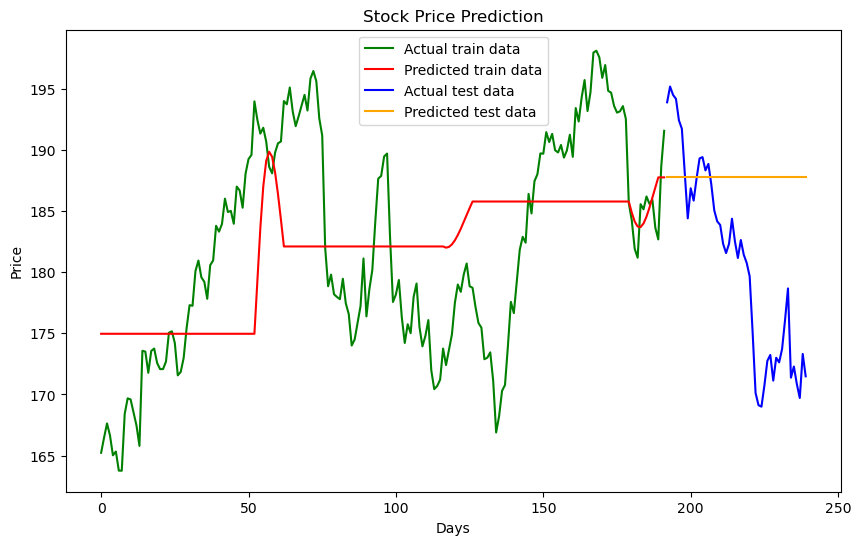

In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


features = AAPL_combined_data[['Interest Income Non Operating', 'Interest Income', 
                          'Interest Expense Non Operating', 'Interest Expense', 'Basic EPS', 
                          'Net Interest Income', 'Net Non Operating Interest Income Expense', 
                          'Basic Average Shares', 'Diluted Average Shares', 'Net Income', 'Operating Income']]
target = AAPL_combined_data['AAPL']
if features.isnull().any().any():
    features.fillna(method='ffill', inplace=True) 
    features.fillna(method='bfill', inplace=True) 

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1,1))

def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

time_step = 10
X, y = create_dataset(scaled_features, scaled_target, time_step)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam


model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, X.shape[2])),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

print("R-squared:", r2)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
actual_train = scaler.inverse_transform(y_train.reshape(-1,1))
actual_test = scaler.inverse_transform(y_test.reshape(-1,1))

# MSE
mse = mean_squared_error(actual_test, test_predict)
print("Mean Squared Error:", mse)

# RMSE
rmse = np.sqrt(mse)  
print("Root Mean Squared Error:", rmse)

# MAE
mae = mean_absolute_error(actual_test, test_predict)
print("Mean Absolute Error:", mae)
from sklearn.metrics import r2_score

r2 = r2_score(actual_test, test_predict)


import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(np.arange(len(actual_train)), actual_train.flatten(), 'g', label="Actual train data")
plt.plot(np.arange(len(train_predict)), train_predict.flatten(), 'r', label="Predicted train data")
plt.plot(np.arange(len(actual_train), len(actual_train) + len(actual_test)), actual_test.flatten(), 'b', label="Actual test data")
plt.plot(np.arange(len(actual_train), len(actual_train) + len(test_predict)), test_predict.flatten(), 'orange', label="Predicted test data")
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


### Bidirectional Model

Epoch 1/50


/var/folders/c6/1h0zxljx7pj2pvy91xhq_6qw0000gn/T/ipykernel_34547/2659894976.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(method='ffill', inplace=True)
/var/folders/c6/1h0zxljx7pj2pvy91xhq_6qw0000gn/T/ipykernel_34547/2659894976.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(method='bfill', inplace=True)
/Users/jady/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.2684 - val_loss: 0.2161
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1024 - val_loss: 0.0445
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0599 - val_loss: 0.0435
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0529 - val_loss: 0.0620
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0465 - val_loss: 0.1095
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0477 - val_loss: 0.0797
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0504 - val_loss: 0.0682
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0442 - val_loss: 0.0899
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0440 - val_loss: 0.1095
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0465 - val_loss: 0.0855
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0407 - val_loss: 0.0772
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0471 - val_loss: 0.0902
Epoch 13/50
6/6 ━━━━━━━

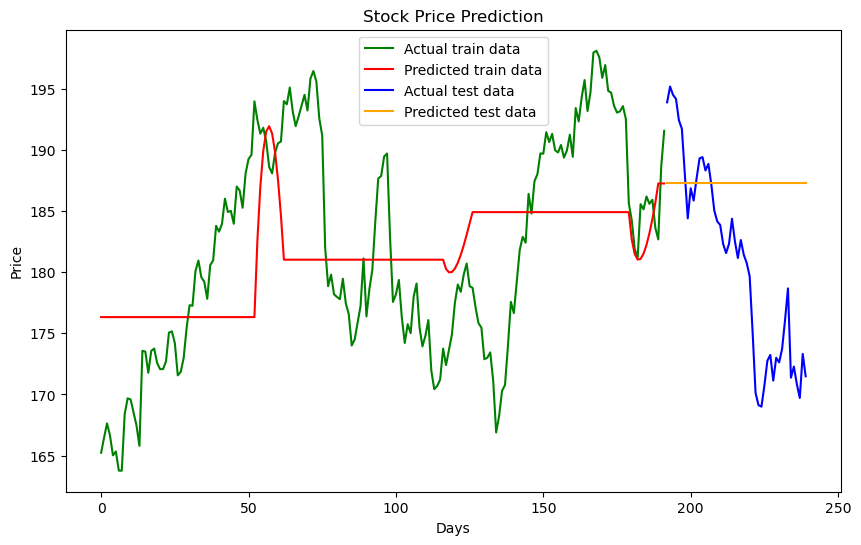

In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


features = AAPL_combined_data[['Interest Income Non Operating', 'Interest Income', 
                          'Interest Expense Non Operating', 'Interest Expense', 'Basic EPS', 
                          'Net Interest Income', 'Net Non Operating Interest Income Expense', 
                          'Basic Average Shares', 'Diluted Average Shares', 'Net Income', 'Operating Income']]
target = AAPL_combined_data['AAPL']
if features.isnull().any().any():
    features.fillna(method='ffill', inplace=True) 
    features.fillna(method='bfill', inplace=True) 

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1,1))

def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

time_step = 10
X, y = create_dataset(scaled_features, scaled_target, time_step)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Bidirectional(LSTM(50)),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

print("R-squared:", r2)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
actual_train = scaler.inverse_transform(y_train.reshape(-1,1))
actual_test = scaler.inverse_transform(y_test.reshape(-1,1))

# MSE
mse = mean_squared_error(actual_test, test_predict)
print("Mean Squared Error:", mse)

# RMSE
rmse = np.sqrt(mse)  
print("Root Mean Squared Error:", rmse)

# MAE
mae = mean_absolute_error(actual_test, test_predict)
print("Mean Absolute Error:", mae)
from sklearn.metrics import r2_score

r2 = r2_score(actual_test, test_predict)


import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(np.arange(len(actual_train)), actual_train.flatten(), 'g', label="Actual train data")
plt.plot(np.arange(len(train_predict)), train_predict.flatten(), 'r', label="Predicted train data")
plt.plot(np.arange(len(actual_train), len(actual_train) + len(actual_test)), actual_test.flatten(), 'b', label="Actual test data")
plt.plot(np.arange(len(actual_train), len(actual_train) + len(test_predict)), test_predict.flatten(), 'orange', label="Predicted test data")
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


### Add Moving Average & Bidirectional to Model

Epoch 1/50


/var/folders/c6/1h0zxljx7pj2pvy91xhq_6qw0000gn/T/ipykernel_34547/397531341.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(method='ffill', inplace=True)
/var/folders/c6/1h0zxljx7pj2pvy91xhq_6qw0000gn/T/ipykernel_34547/397531341.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(method='bfill', inplace=True)
/Users/jady/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.2473 - val_loss: 0.2069
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1079 - val_loss: 0.0470
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0514 - val_loss: 0.0435
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0595 - val_loss: 0.0646
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0488 - val_loss: 0.1160
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0529 - val_loss: 0.0788
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0468 - val_loss: 0.0725
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0448 - val_loss: 0.0762
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0457 - val_loss: 0.0940
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0441 - val_loss: 0.0738
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0459 - val_loss: 0.0822
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0439 - val_loss: 0.0839
Epoch 13/50
6/6 ━━━━━━━

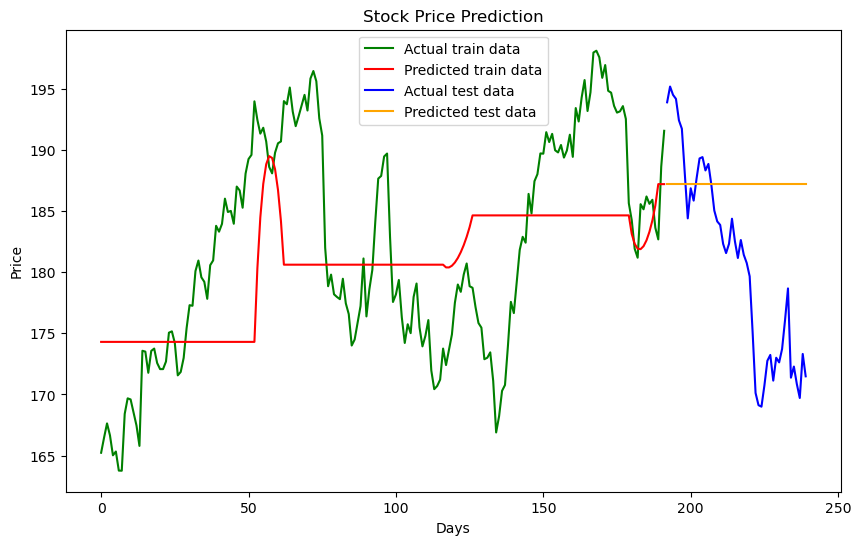

In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


features = AAPL_combined_data[['Interest Income Non Operating', 'Interest Income', 
                          'Interest Expense Non Operating', 'Interest Expense', 'Basic EPS', 
                          'Net Interest Income', 'Net Non Operating Interest Income Expense', 
                          'Basic Average Shares', 'Diluted Average Shares', 'Net Income', 'Operating Income']]
target = AAPL_combined_data['AAPL']
if features.isnull().any().any():
    features.fillna(method='ffill', inplace=True) 
    features.fillna(method='bfill', inplace=True) 


columns_to_roll = ['Interest Income Non Operating', 'Interest Income', 
                   'Interest Expense Non Operating', 'Interest Expense', 'Basic EPS', 
                   'Net Interest Income', 'Net Non Operating Interest Income Expense', 
                   'Basic Average Shares', 'Diluted Average Shares', 'Net Income', 'Operating Income']

for col in columns_to_roll:
    AAPL_combined_data[f'{col}_100_day_MA'] = AAPL_combined_data[col].rolling(window=200).mean()

AAPL_combined_data.fillna(method='bfill', inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1,1))

def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

time_step = 10
X, y = create_dataset(scaled_features, scaled_target, time_step)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Bidirectional(LSTM(50)),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

print("R-squared:", r2)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
actual_train = scaler.inverse_transform(y_train.reshape(-1,1))
actual_test = scaler.inverse_transform(y_test.reshape(-1,1))

# MSE
mse = mean_squared_error(actual_test, test_predict)
print("Mean Squared Error:", mse)

# RMSE
rmse = np.sqrt(mse)  
print("Root Mean Squared Error:", rmse)

# MAE
mae = mean_absolute_error(actual_test, test_predict)
print("Mean Absolute Error:", mae)
from sklearn.metrics import r2_score

r2 = r2_score(actual_test, test_predict)


import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(np.arange(len(actual_train)), actual_train.flatten(), 'g', label="Actual train data")
plt.plot(np.arange(len(train_predict)), train_predict.flatten(), 'r', label="Predicted train data")
plt.plot(np.arange(len(actual_train), len(actual_train) + len(actual_test)), actual_test.flatten(), 'b', label="Actual test data")
plt.plot(np.arange(len(actual_train), len(actual_train) + len(test_predict)), test_predict.flatten(), 'orange', label="Predicted test data")
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


### Predict AAPL's Stock Price Based on S&P500 Stock Price History by LSTM Model

#### Set Date Period for Combination

In [58]:
import pandas as pd
start_date = '2023-03-31'
end_date = '2024-03-31'
filtered_sp500 = sp500.loc[start_date:end_date]
AAPL_combined_data = pd.merge(AAPL_combined_data, filtered_sp500[['Close']], left_index=True, right_index=True, how='left', suffixes=('', '_SP500'))

#### Filling Null Rows Caused by Seasonal Report

In [59]:
AAPL_combined_data.fillna(method='ffill', inplace=True)
AAPL_combined_data.fillna(method='bfill', inplace=True)
AAPL_combined_data.head()

,AAPL,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,...,Interest Expense Non Operating_100_day_MA,Interest Expense_100_day_MA,Basic EPS_100_day_MA,Net Interest Income_100_day_MA,Net Non Operating Interest Income Expense_100_day_MA,Basic Average Shares_100_day_MA,Diluted Average Shares_100_day_MA,Net Income_100_day_MA,Operating Income_100_day_MA,Close
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-31,164.899994,0.0,0.149,3.221000e+10,2.416000e+10,2.898000e+09,5.286000e+10,3.221000e+10,2.931200e+10,-12000000.0,...,NaN,NaN,1.4642,NaN,NaN,1.568411e+10,1.575411e+10,2.294804e+10,2.685369e+10,4109.310059
2023-04-03,166.169998,0.0,0.149,3.221000e+10,2.416000e+10,2.898000e+09,5.286000e+10,3.221000e+10,2.931200e+10,-12000000.0,...,NaN,NaN,1.4642,NaN,NaN,1.568411e+10,1.575411e+10,2.294804e+10,2.685369e+10,4124.509766
2023-04-04,165.630005,0.0,0.149,3.221000e+10,2.416000e+10,2.898000e+09,5.286000e+10,3.221000e+10,2.931200e+10,-12000000.0,...,NaN,NaN,1.4642,NaN,NaN,1.568411e+10,1.575411e+10,2.294804e+10,2.685369e+10,4100.600098
2023-04-05,163.759995,0.0,0.149,3.221000e+10,2.416000e+10,2.898000e+09,5.286000e+10,3.221000e+10,2.931200e+10,-12000000.0,...,NaN,NaN,1.4642,NaN,NaN,1.568411e+10,1.575411e+10,2.294804e+10,2.685369e+10,4090.379883
2023-04-06,164.660004,0.0,0.149,3.221000e+10,2.416000e+10,2.898000e+09,5.286000e+10,3.221000e+10,2.931200e+10,-12000000.0,...,NaN,NaN,1.4642,NaN,NaN,1.568411e+10,1.575411e+10,2.294804e+10,2.685369e+10,4105.020020


Epoch 1/50


/Users/jady/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.3695 - val_loss: 0.1296
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0697 - val_loss: 1.0199
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0607 - val_loss: 0.3154
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0439 - val_loss: 0.2328
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0419 - val_loss: 0.3657
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0365 - val_loss: 0.3968
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0353 - val_loss: 0.2567
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0360 - val_loss: 0.2283
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0332 - val_loss: 0.2546
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0321 - val_loss: 0.2589
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0321 - val_loss: 0.2327
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0349 - val_loss: 0.2195
Epoch 13/50


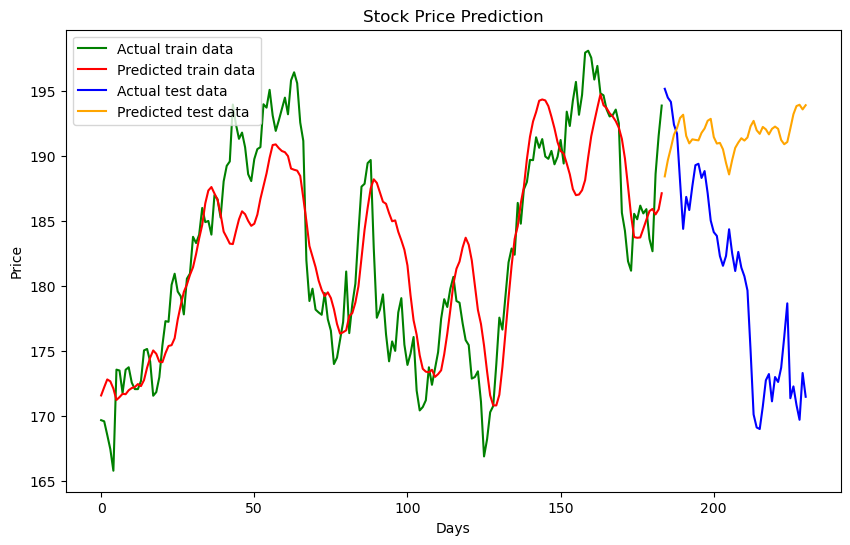

In [61]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


features = AAPL_combined_data[['Close']]

target = AAPL_combined_data['AAPL']
if features.isnull().any().any():
    features.fillna(method='ffill', inplace=True)
    features.fillna(method='bfill', inplace=True) 

columns_to_roll = ['Interest Income Non Operating', 'Interest Income', 
                   'Interest Expense Non Operating', 'Interest Expense', 'Basic EPS', 
                   'Net Interest Income', 'Net Non Operating Interest Income Expense', 
                   'Basic Average Shares', 'Diluted Average Shares', 'Net Income', 'Operating Income']
for col in columns_to_roll:
    AAPL_combined_data[f'{col}_100_day_MA'] = AAPL_combined_data[col].rolling(window=100).mean()

AAPL_combined_data.fillna(method='bfill', inplace=True)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1,1))

def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

time_step = 19
X, y = create_dataset(scaled_features, scaled_target, time_step)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Bidirectional(LSTM(50)),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Inverse Scaler
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
actual_train = scaler.inverse_transform(y_train.reshape(-1,1))
actual_test = scaler.inverse_transform(y_test.reshape(-1,1))


# MSE
mse = mean_squared_error(actual_test, test_predict)
print("Mean Squared Error:", mse)

# RMSE
rmse = np.sqrt(mse) 
print("Root Mean Squared Error:", rmse)

# MAE
mae = mean_absolute_error(actual_test, test_predict)
print("Mean Absolute Error:", mae)
from sklearn.metrics import r2_score
# R Squared
r2 = r2_score(actual_test, test_predict)
print("R-squared:", r2)


import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(np.arange(len(actual_train)), actual_train.flatten(), 'g', label="Actual train data")
plt.plot(np.arange(len(train_predict)), train_predict.flatten(), 'r', label="Predicted train data")
plt.plot(np.arange(len(actual_train), len(actual_train) + len(actual_test)), actual_test.flatten(), 'b', label="Actual test data")
plt.plot(np.arange(len(actual_train), len(actual_train) + len(test_predict)), test_predict.flatten(), 'orange', label="Predicted test data")
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


### Combining S&P 500 Dataset with AAPL's Seasonal Financial Report Dataset to Build LSTM

Epoch 1/50


/Users/jady/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.1813 - val_loss: 0.0405
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0520 - val_loss: 0.0456
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0494 - val_loss: 0.1121
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0432 - val_loss: 0.1466
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0384 - val_loss: 0.1276
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0384 - val_loss: 0.1974
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0319 - val_loss: 0.1996
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0316 - val_loss: 0.1976
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0304 - val_loss: 0.2532
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0269 - val_loss: 0.2062
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0262 - val_loss: 0.2841
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0241 - val_loss: 0.2408
Epoch 13/50
6

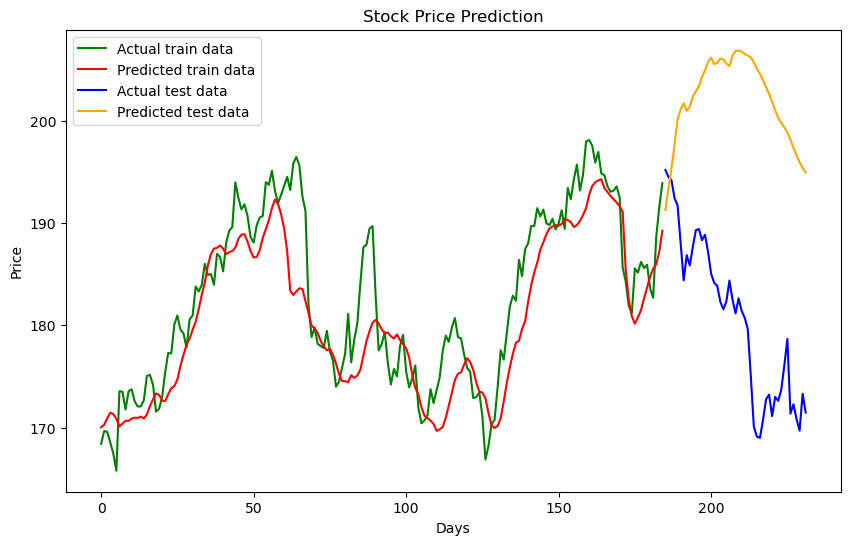

In [68]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

features = AAPL_combined_data[['Interest Income Non Operating', 'Interest Income', 
                          'Interest Expense Non Operating', 'Interest Expense', 'Basic EPS', 
                          'Net Interest Income', 'Net Non Operating Interest Income Expense', 
                          'Basic Average Shares', 'Diluted Average Shares', 'Net Income', 'Operating Income','Close']]
target = AAPL_combined_data['AAPL']
if features.isnull().any().any():
    features.fillna(method='ffill', inplace=True) 
    features.fillna(method='bfill', inplace=True)  

columns_to_roll = ['Interest Income Non Operating', 'Interest Income', 
                   'Interest Expense Non Operating', 'Interest Expense', 'Basic EPS', 
                   'Net Interest Income', 'Net Non Operating Interest Income Expense', 
                   'Basic Average Shares', 'Diluted Average Shares', 'Net Income', 'Operating Income']

for col in columns_to_roll:
    AAPL_combined_data[f'{col}_100_day_MA'] = AAPL_combined_data[col].rolling(window=100).mean()

AAPL_combined_data.fillna(method='bfill', inplace=True)
#Scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1,1))

def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

time_step = 18
X, y = create_dataset(scaled_features, scaled_target, time_step)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Bidirectional(LSTM(50)),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error



#Inverse Scaler
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
actual_train = scaler.inverse_transform(y_train.reshape(-1,1))
actual_test = scaler.inverse_transform(y_test.reshape(-1,1))

#MSE
mse = mean_squared_error(actual_test, test_predict)
print("Mean Squared Error:", mse)

#RMSE
rmse = np.sqrt(mse) 
print("Root Mean Squared Error:", rmse)

#MAE
mae = mean_absolute_error(actual_test, test_predict)
print("Mean Absolute Error:", mae)
from sklearn.metrics import r2_score
#R Squiared
r2 = r2_score(actual_test, test_predict)
print("R-squared:", r2)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(np.arange(len(actual_train)), actual_train.flatten(), 'g', label="Actual train data")
plt.plot(np.arange(len(train_predict)), train_predict.flatten(), 'r', label="Predicted train data")
plt.plot(np.arange(len(actual_train), len(actual_train) + len(actual_test)), actual_test.flatten(), 'b', label="Actual test data")
plt.plot(np.arange(len(actual_train), len(actual_train) + len(test_predict)), test_predict.flatten(), 'orange', label="Predicted test data")
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


### Adding Three Other Company's Stock Price Datasets to This Model

In [69]:
import pandas as pd

Three_Company = pd.read_csv('technology_sector_stocks_closing_prices_20240419.csv')
Three_Company['Date'] = pd.to_datetime(Three_Company['Date'])
Three_Company.set_index('Date', inplace=True)
start_date = '2023-03-31'
end_date = '2024-03-31'
filtered_Three_Company = Three_Company.loc[start_date:end_date]
AAPL_combined_data = pd.merge(AAPL_combined_data, filtered_Three_Company[['MSFT','NVDA','BABA']], left_index=True, right_index=True, how='left', suffixes=('', '_Three_Company'))
AAPL_combined_data.fillna(method='ffill', inplace=True)
AAPL_combined_data.fillna(method='bfill', inplace=True)

In [70]:
AAPL_combined_data.head()

,AAPL,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,...,Net Interest Income_100_day_MA,Net Non Operating Interest Income Expense_100_day_MA,Basic Average Shares_100_day_MA,Diluted Average Shares_100_day_MA,Net Income_100_day_MA,Operating Income_100_day_MA,Close,MSFT,NVDA,BABA
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-31,164.899994,0.0,0.149,3.221000e+10,2.416000e+10,2.898000e+09,5.286000e+10,3.221000e+10,2.931200e+10,-12000000.0,...,-14280000.0,-14280000.0,1.575313e+10,1.581968e+10,2.253398e+10,2.629640e+10,4109.310059,102.180000,288.299988,277.769989
2023-04-03,166.169998,0.0,0.149,3.221000e+10,2.416000e+10,2.898000e+09,5.286000e+10,3.221000e+10,2.931200e+10,-12000000.0,...,-14280000.0,-14280000.0,1.575313e+10,1.581968e+10,2.253398e+10,2.629640e+10,4124.509766,98.389999,287.230011,279.649994
2023-04-04,165.630005,0.0,0.149,3.221000e+10,2.416000e+10,2.898000e+09,5.286000e+10,3.221000e+10,2.931200e+10,-12000000.0,...,-14280000.0,-14280000.0,1.575313e+10,1.581968e+10,2.253398e+10,2.629640e+10,4100.600098,100.720001,287.179993,274.529999
2023-04-05,163.759995,0.0,0.149,3.221000e+10,2.416000e+10,2.898000e+09,5.286000e+10,3.221000e+10,2.931200e+10,-12000000.0,...,-14280000.0,-14280000.0,1.575313e+10,1.581968e+10,2.253398e+10,2.629640e+10,4090.379883,98.550003,284.339996,268.809998
2023-04-06,164.660004,0.0,0.149,3.221000e+10,2.416000e+10,2.898000e+09,5.286000e+10,3.221000e+10,2.931200e+10,-12000000.0,...,-14280000.0,-14280000.0,1.575313e+10,1.581968e+10,2.253398e+10,2.629640e+10,4105.020020,102.739998,291.600006,270.369995


Epoch 1/50


/Users/jady/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.1370 - val_loss: 0.0754
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0615 - val_loss: 0.0464
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0418 - val_loss: 0.1958
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0436 - val_loss: 0.1295
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0333 - val_loss: 0.0965
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0320 - val_loss: 0.1702
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0261 - val_loss: 0.1361
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0238 - val_loss: 0.1520
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0200 - val_loss: 0.1449
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0201 - val_loss: 0.1695
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0164 - val_loss: 0.1773
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0151 - val_loss: 0.1780
Epoch 13/50
6/6 ━━━━━━━

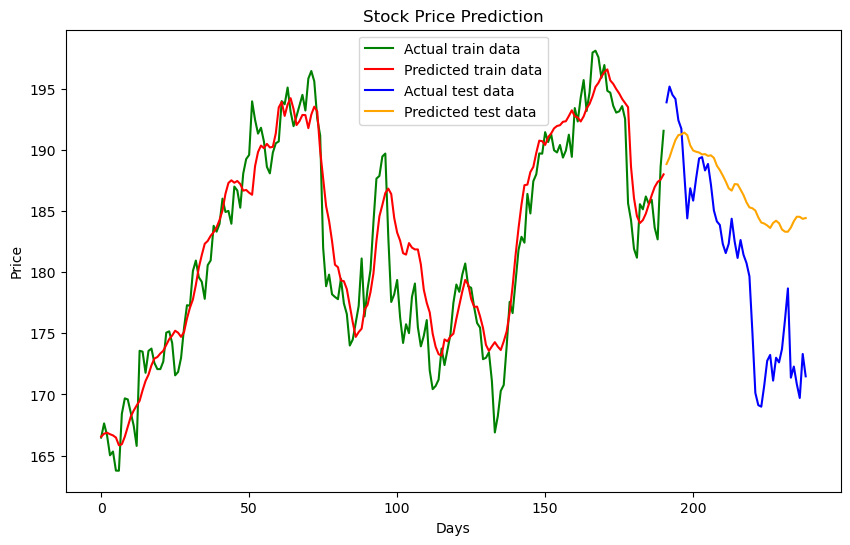

In [77]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


features = AAPL_combined_data[['Interest Income Non Operating', 'Interest Income', 
                          'Interest Expense Non Operating', 'Interest Expense', 'Basic EPS', 
                          'Net Interest Income', 'Net Non Operating Interest Income Expense', 
                          'Basic Average Shares', 'Diluted Average Shares', 'Net Income', 'Operating Income','Close','MSFT','NVDA','BABA']]


target = AAPL_combined_data['AAPL']
if features.isnull().any().any():
    features.fillna(method='ffill', inplace=True) 
    features.fillna(method='bfill', inplace=True) 

columns_to_roll = ['Interest Income Non Operating', 'Interest Income', 
                   'Interest Expense Non Operating', 'Interest Expense', 'Basic EPS', 
                   'Net Interest Income', 'Net Non Operating Interest Income Expense', 
                   'Basic Average Shares', 'Diluted Average Shares', 'Net Income', 'Operating Income']
for col in columns_to_roll:
    AAPL_combined_data[f'{col}_100_day_MA'] = AAPL_combined_data[col].rolling(window=100).mean()
AAPL_combined_data.fillna(method='bfill', inplace=True)

#Scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1,1))

#LSTM
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)
time_step = 11
X, y = create_dataset(scaled_features, scaled_target, time_step)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Bidirectional(LSTM(50)),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
#Inverse Scaler
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
actual_train = scaler.inverse_transform(y_train.reshape(-1,1))
actual_test = scaler.inverse_transform(y_test.reshape(-1,1))
#MSE
mse = mean_squared_error(actual_test, test_predict)
print("Mean Squared Error:", mse)

#RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

#MAE
mae = mean_absolute_error(actual_test, test_predict)
print("Mean Absolute Error:", mae)
from sklearn.metrics import r2_score

r2 = r2_score(actual_test, test_predict)
print("R-squared:", r2)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(np.arange(len(actual_train)), actual_train.flatten(), 'g', label="Actual train data")
plt.plot(np.arange(len(train_predict)), train_predict.flatten(), 'r', label="Predicted train data")
plt.plot(np.arange(len(actual_train), len(actual_train) + len(actual_test)), actual_test.flatten(), 'b', label="Actual test data")
plt.plot(np.arange(len(actual_train), len(actual_train) + len(test_predict)), test_predict.flatten(), 'orange', label="Predicted test data")
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
